In [1]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#length of data
len(df)

8807

In [3]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [5]:
#checking null values in every column of our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [7]:
#unnesting the directors column, i.e- creating separate lines for each director in a movie
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [8]:
#unnesting the cast column, i.e- creating separate lines for each cast member in a movie
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [9]:
#unnesting the listed_in column, i.e- creating separate lines for each genre in a movie
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [10]:
#unnesting the country column, i.e- creating separate lines for each country in a movie
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [11]:
#merging the unnested director data with unnested actors data
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
#merging the above merged data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
#merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head()

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [12]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [13]:
#now checking nulls
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [14]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [15]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
# pd.set_option('display.max_rows',None)

In [16]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()].head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [17]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [18]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country 
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of 
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['country'].isnull()]['Directors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [19]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
    imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)       
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [20]:
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [21]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [22]:
#removing mins from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [23]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [24]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [25]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [26]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


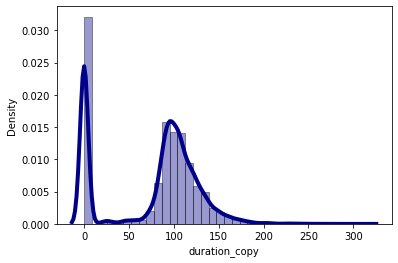

In [27]:
import seaborn as sns
sns.distplot(df_final1['duration_copy'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [28]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [29]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [30]:
df_final1['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [31]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_19483/917954583.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [32]:
#Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages,
#presence of brackets and content between brackets is removed.
df_final1['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_19483/3753997727.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final1['title']=df_final1['title'].str.replace(r"\(.*\)","")


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


#### Univariate Analysis in terms of counts of each column

In [33]:
#number of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"})

,title
Genre,
Action & Adventure,854
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,639
Classic & Cult TV,28
Classic Movies,116
Comedies,1673
Crime TV Shows,470


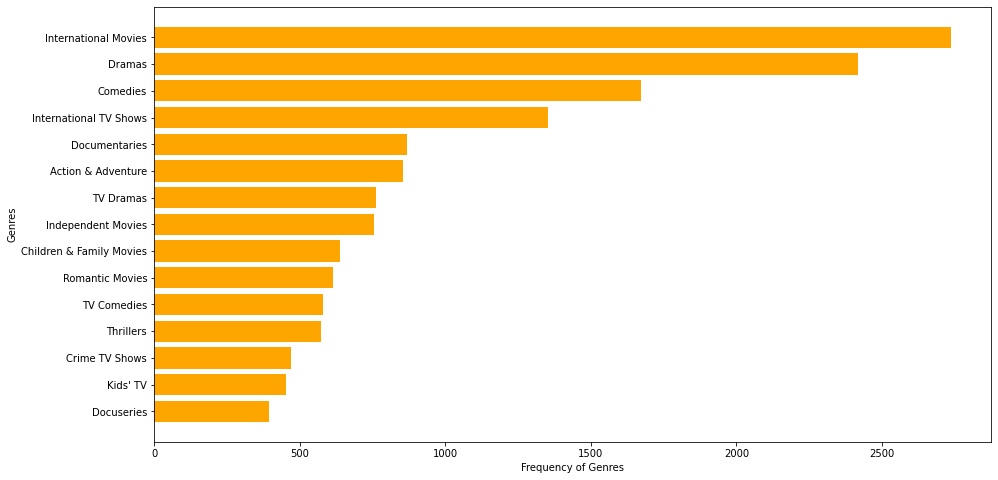

In [34]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedies are the most popular .

In [35]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":"nunique"})

,title
type,
Movie,6115
TV Show,2676


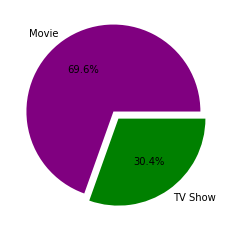

In [36]:
 df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
 plt.show()

We have 70:30 ratio of Movies and TV Shows in our data

In [37]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same

In [38]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [39]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


Now it looks great.

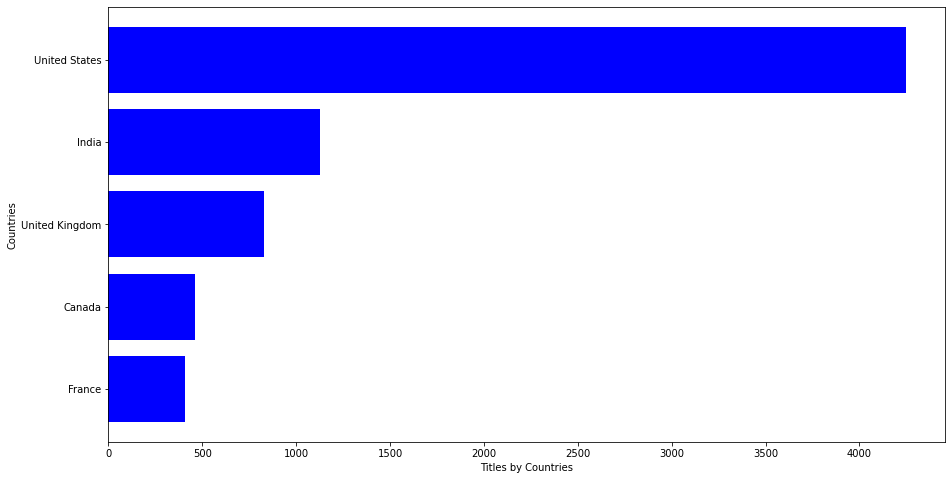

In [40]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

US,India,UK,Canada and France are leading countries in Content Creation on Netflix

In [41]:
#number of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({"title":"nunique"})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2151
TV-G,220
TV-MA,3204


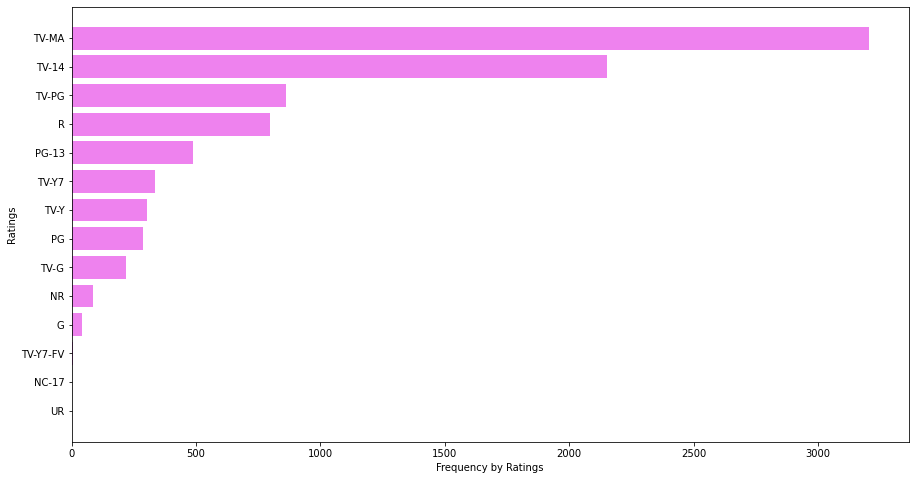

In [42]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

In [43]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"})

,title
duration,
1 Season,1793
1-50,287
10 Seasons,7
100-120,1671
11 Seasons,2
12 Seasons,2
120-150,891
13 Seasons,3
15 Seasons,2


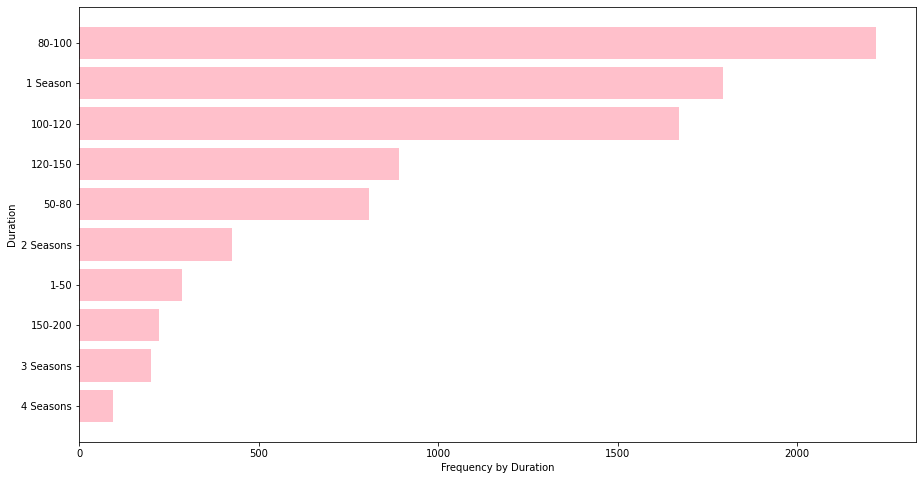

In [44]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

In [45]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Actors']).agg({"title":"nunique"})

,title
Actors,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
...,...
Şevket Çoruh,1
Şinasi Yurtsever,3
Şükran Ovalı,1


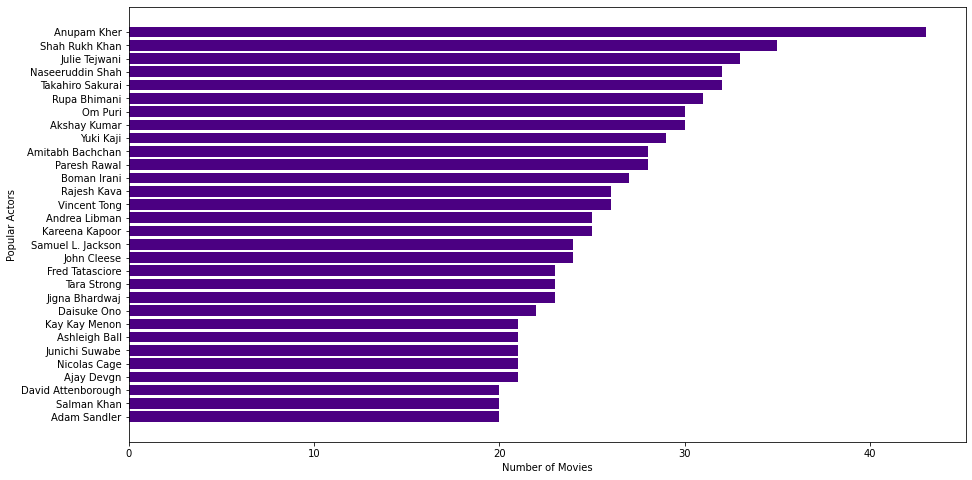

In [46]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

In [47]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['Directors']).agg({"title":"nunique"})

,title
Directors,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Éric Warin,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


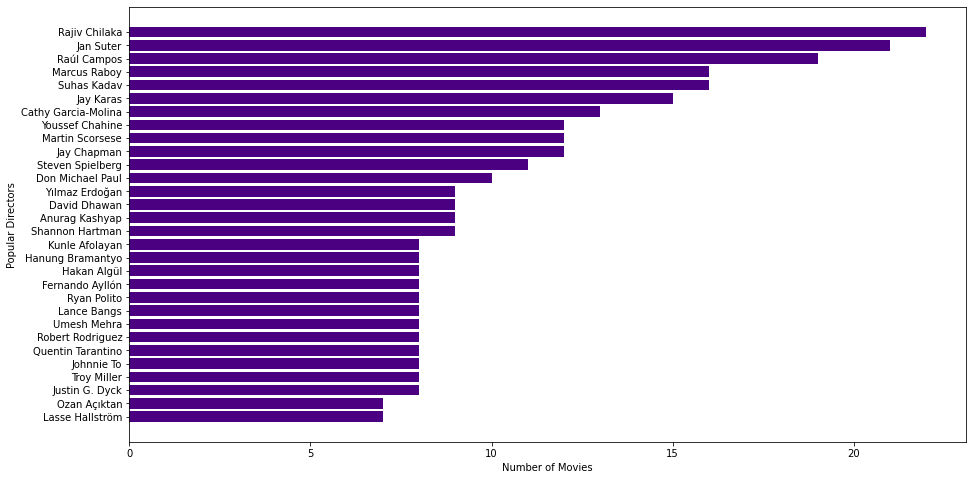

In [48]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

In [49]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

,title
year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,432


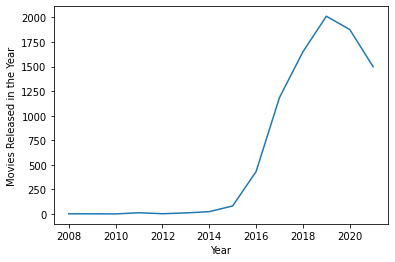

In [50]:
df_year=df_final1.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

In [51]:
#number of distinct titles on the basis of week
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

,title
week_Added,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


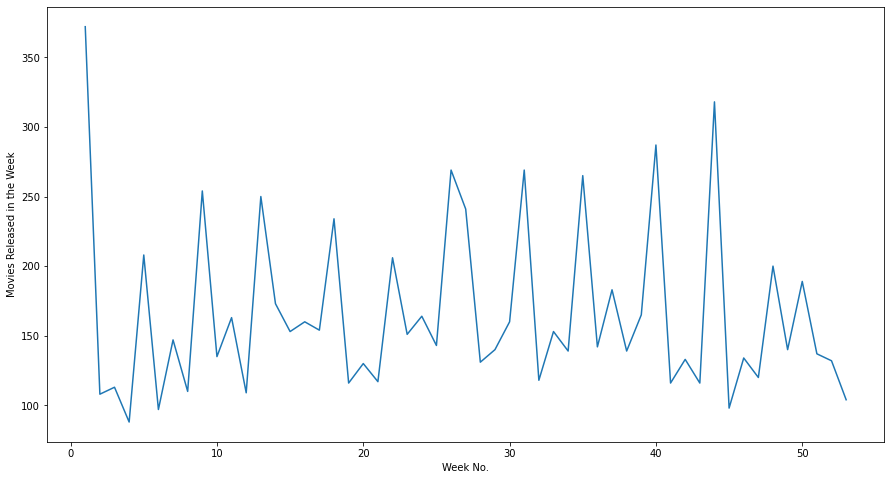

In [52]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

In [53]:
#number of distinct titles on the basis of week
df_final1.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1,738
2,563
3,742
4,765
5,631
6,726
7,832
8,748
9,771


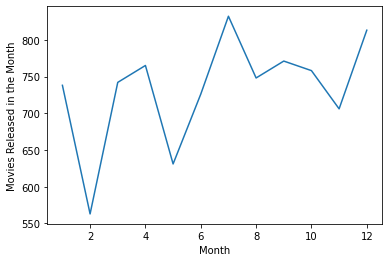

In [54]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first and last months across Netflix(reinstating what we observed for first week in baove plot )

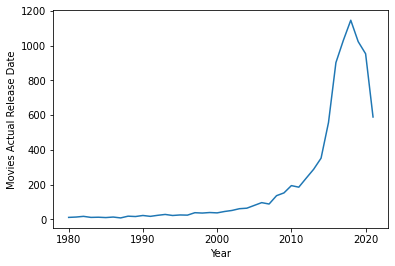

In [55]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced certainly due to COVID-19

#### Univariate Analysis separately for shows and movies
---



In [56]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

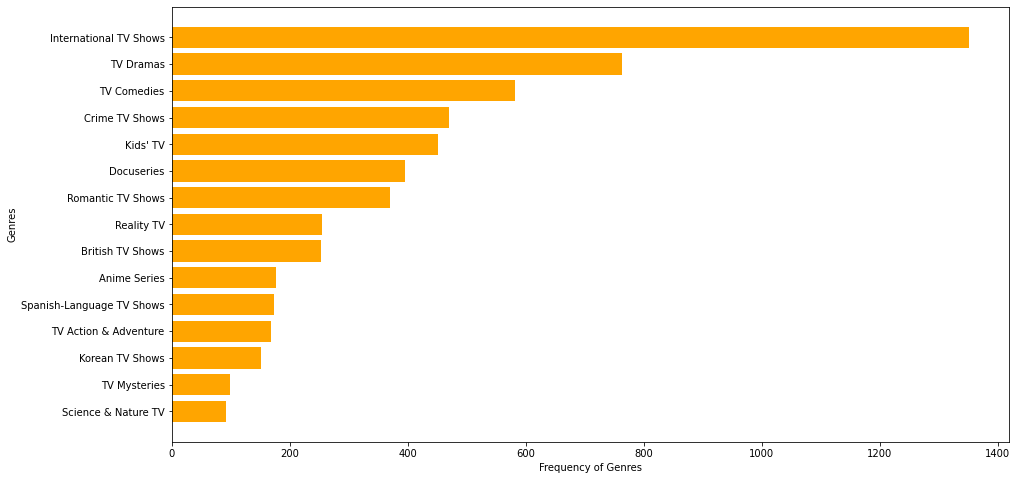

In [57]:
df_genre=df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

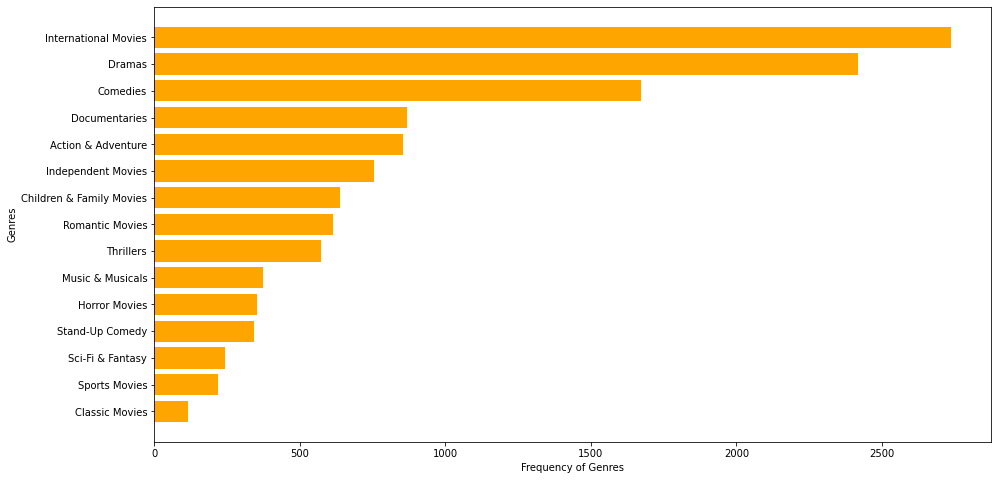

In [58]:
df_genre=df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

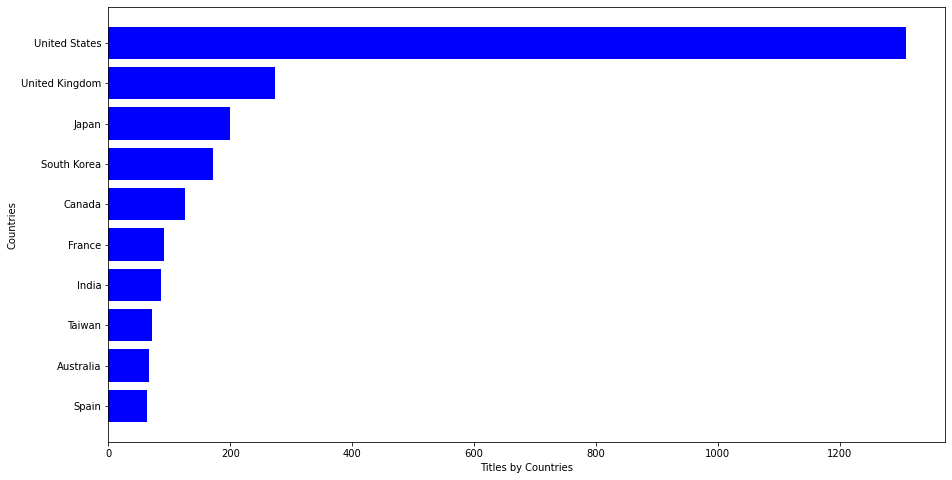

In [59]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

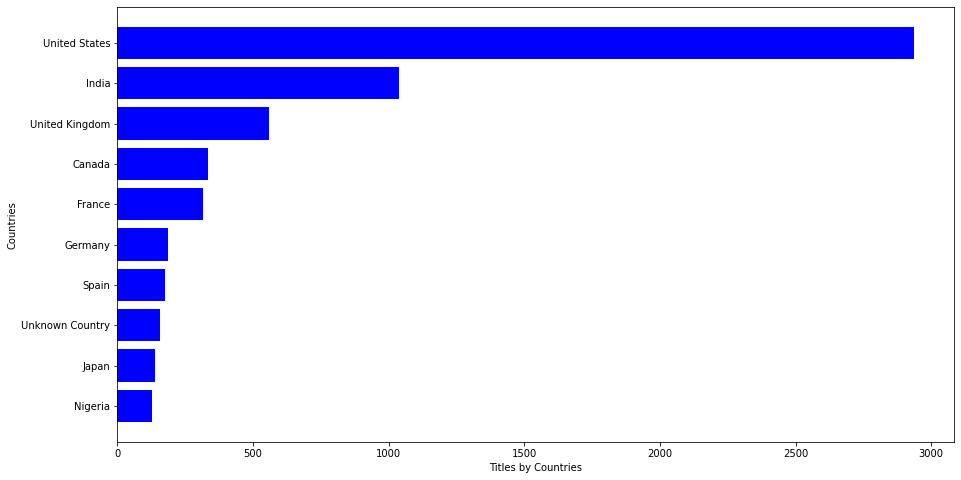

In [60]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows. 

Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

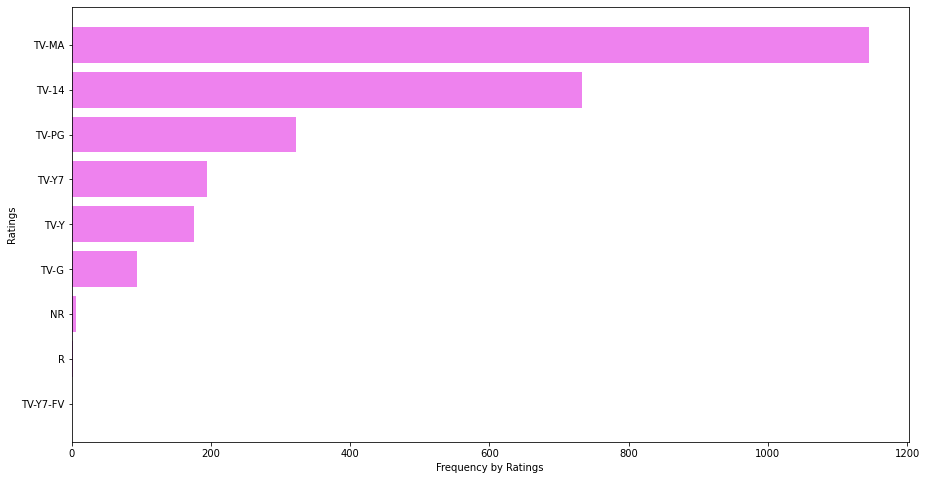

In [61]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

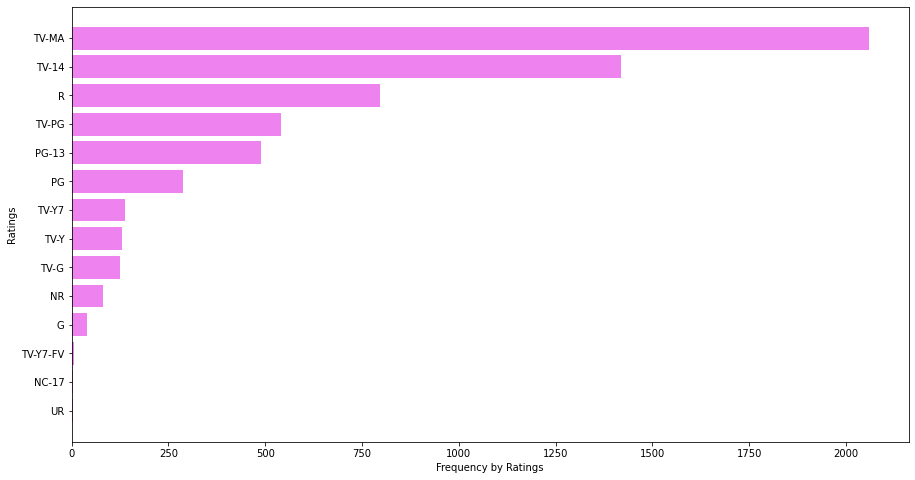

In [62]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

Moreover there are no TV Shows having a rating of R 

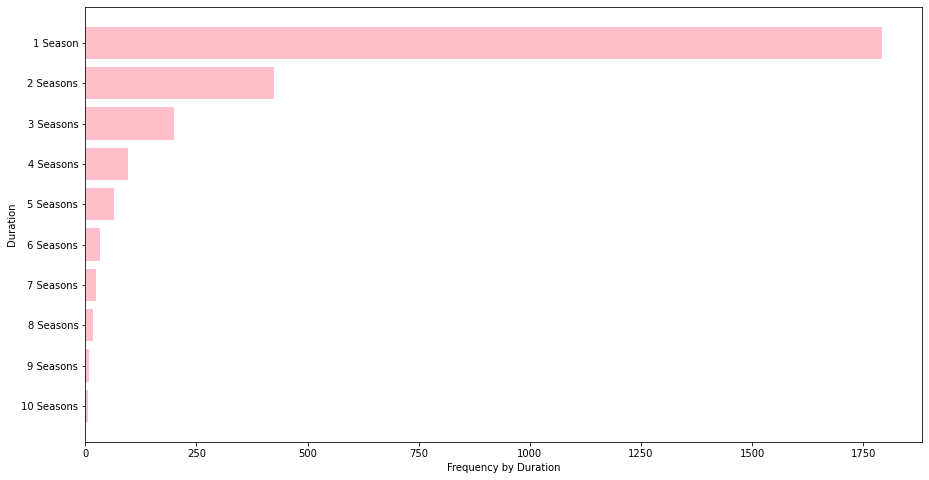

In [63]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

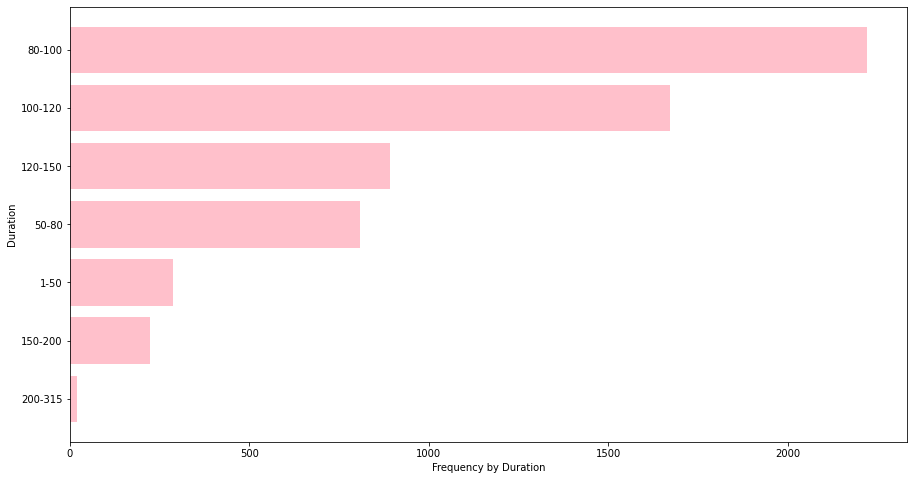

In [64]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

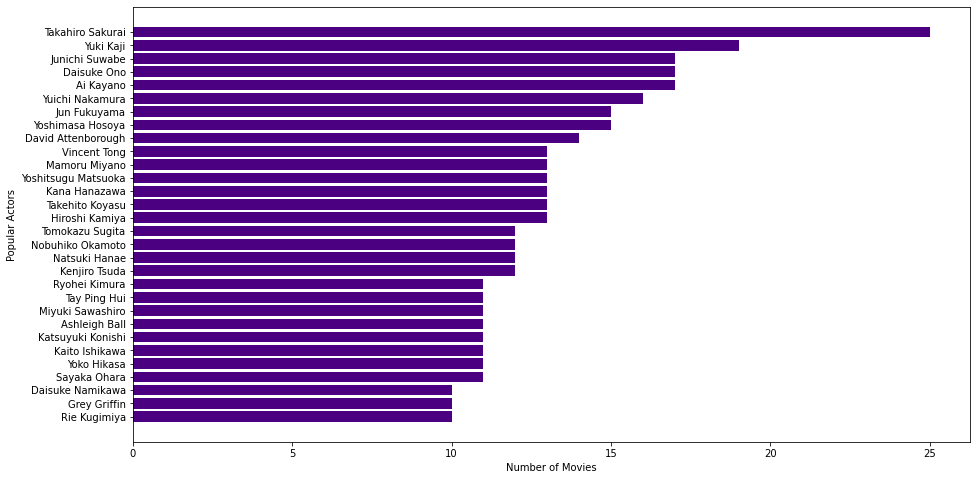

In [65]:
df_actors=df_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

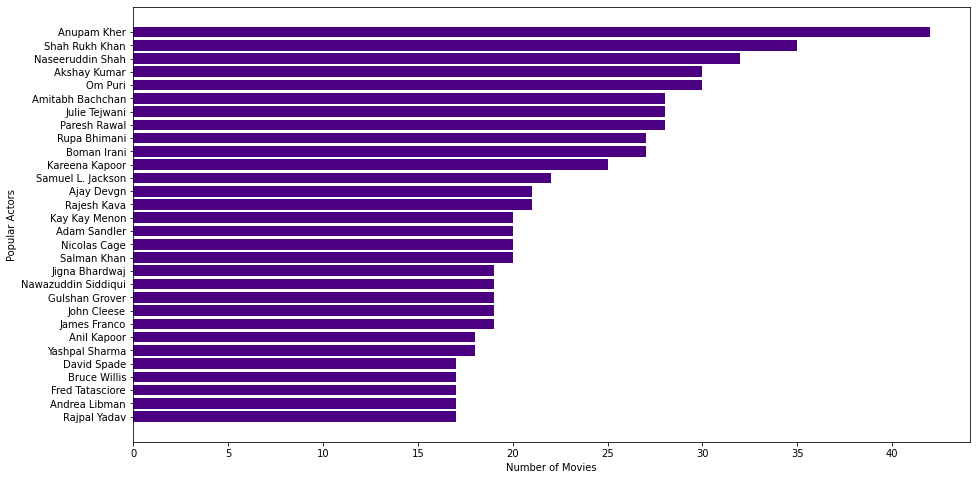

In [66]:
df_actors=df_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

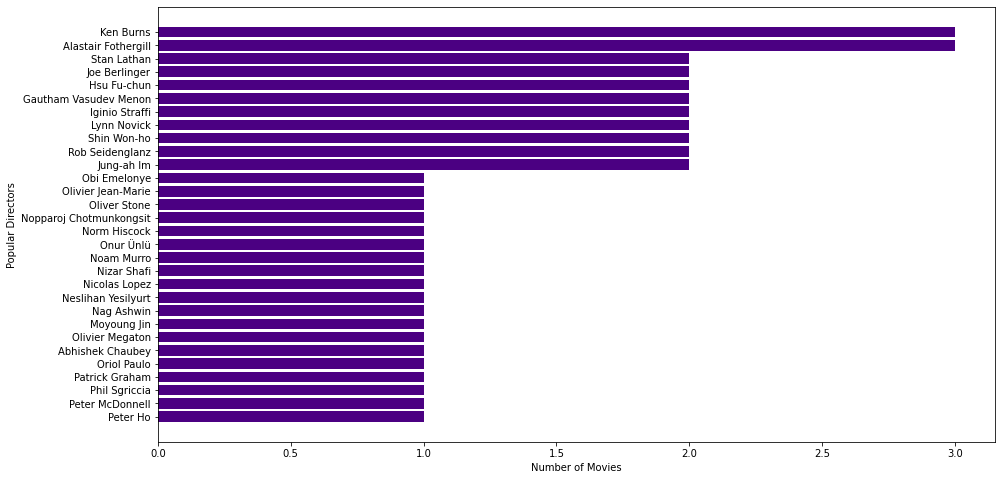

In [67]:
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

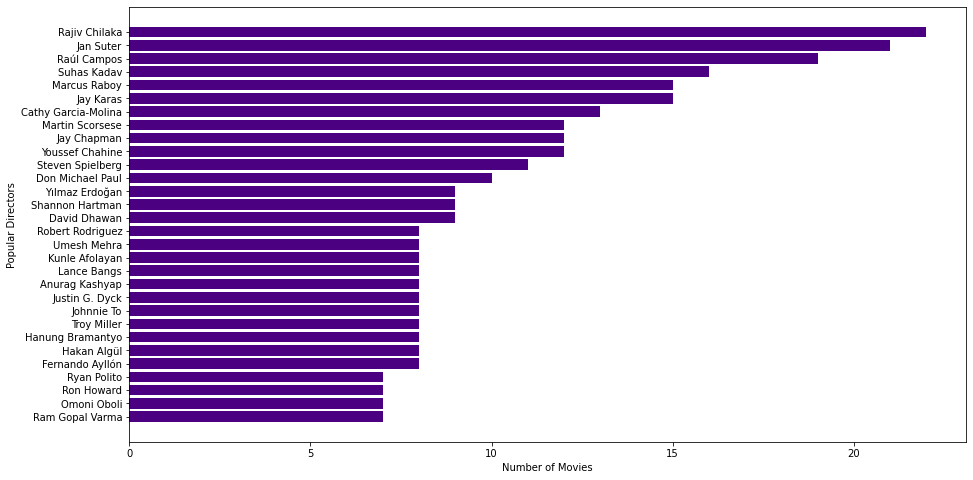

In [68]:
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

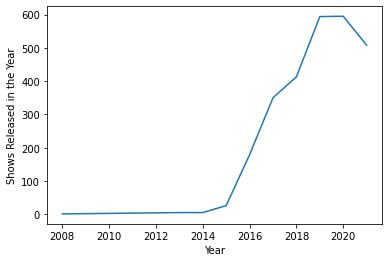

In [69]:
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

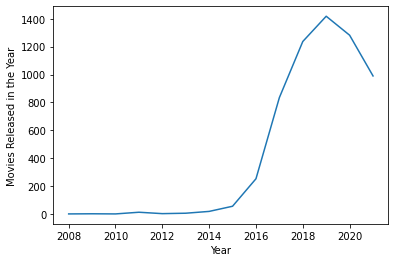

In [70]:
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

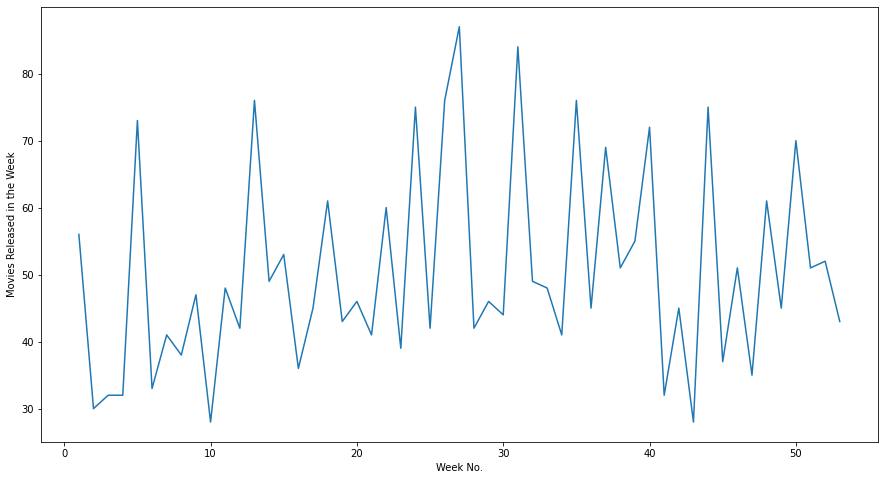

In [71]:
df_week=df_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

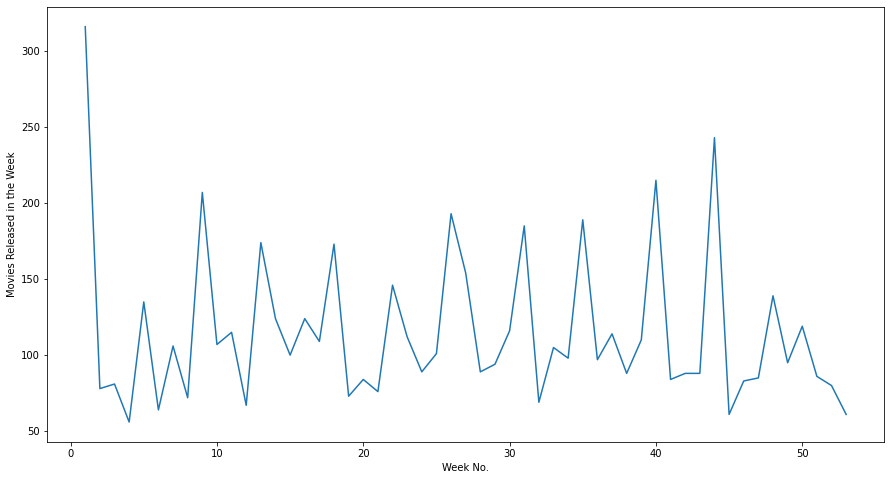

In [72]:
df_week=df_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

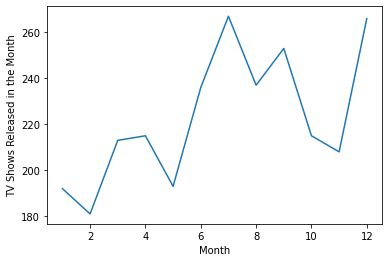

In [73]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

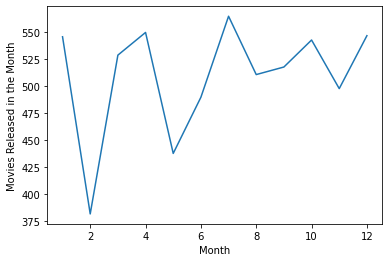

In [74]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

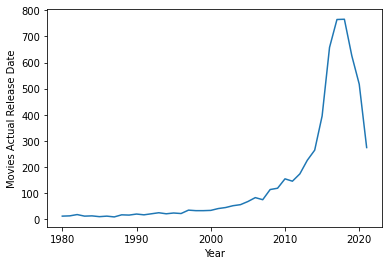

In [75]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

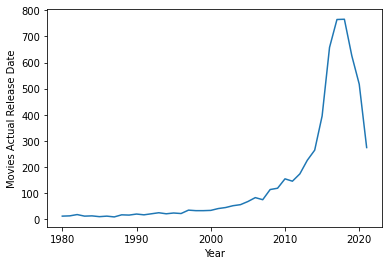

In [76]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

## Questions to be Explored Now for Recommendations

1) So this time, the granularity level is country  and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies. There are definitely some common countries too which bring out quality content in both TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3)In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4)Who are the popular actors/directors across TV Shows and Movies in these countries?

5)In what time of the year, people tend to watch movies and shows in these countries?

6)Popular Actor and Director Combinations in these countries

In [77]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

#### Univariate Analysis separately for shows and movies in USA
---



In [78]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

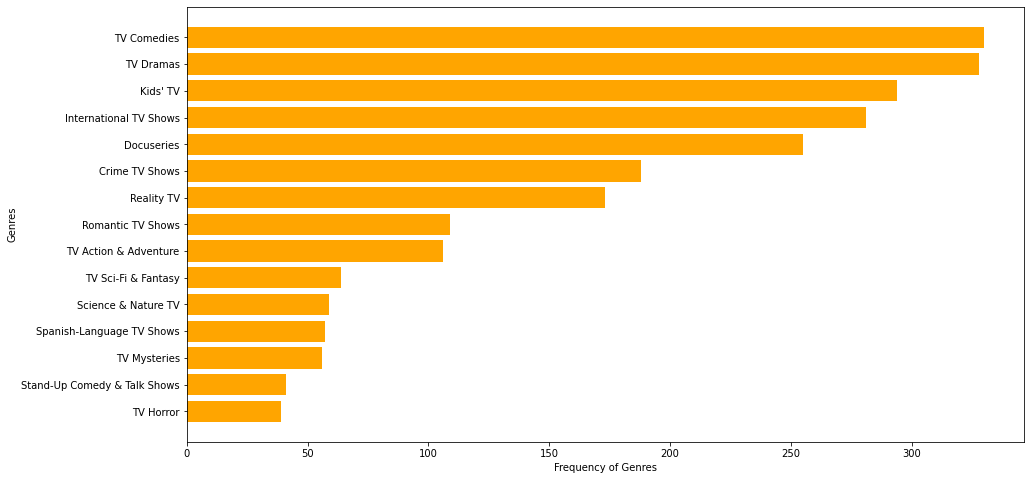

In [79]:
df_genre=df_usa_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

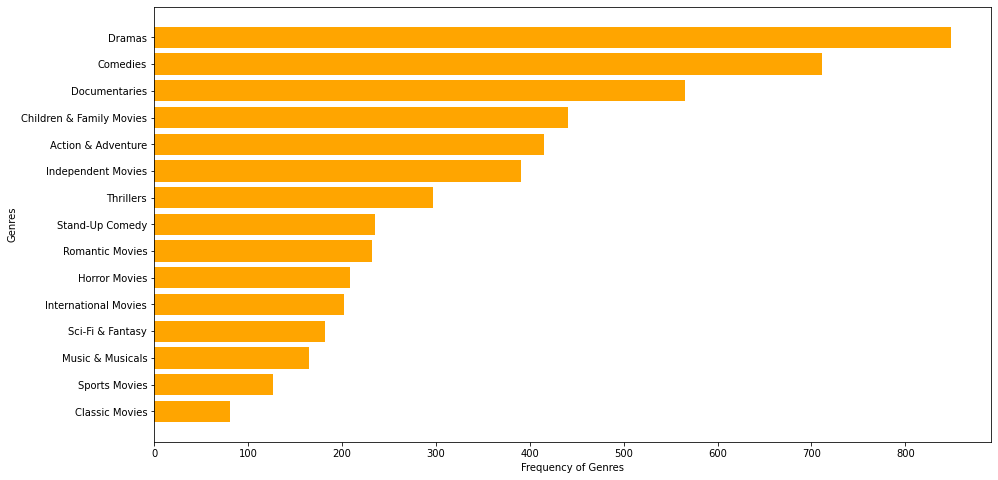

In [80]:
df_genre=df_usa_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

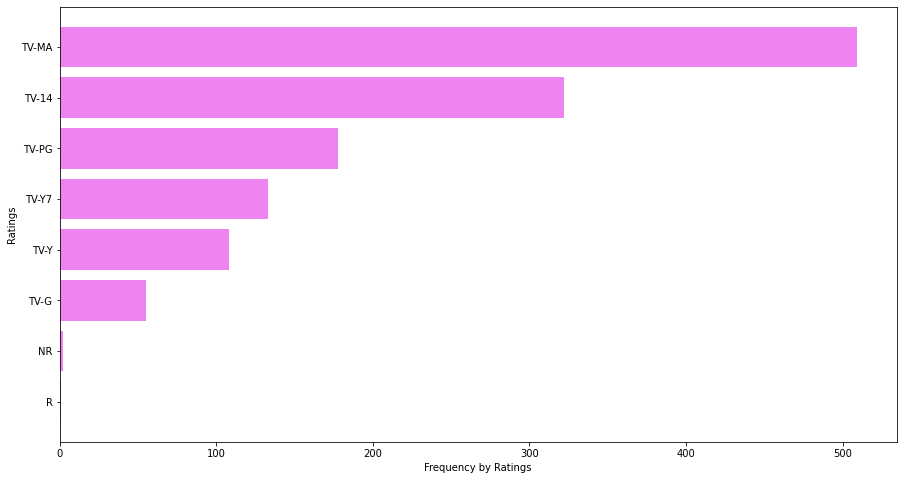

In [81]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

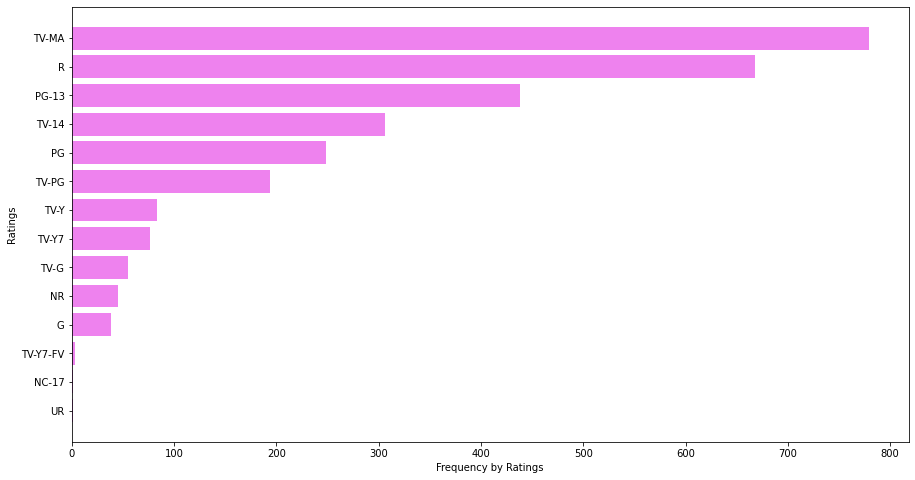

In [82]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA


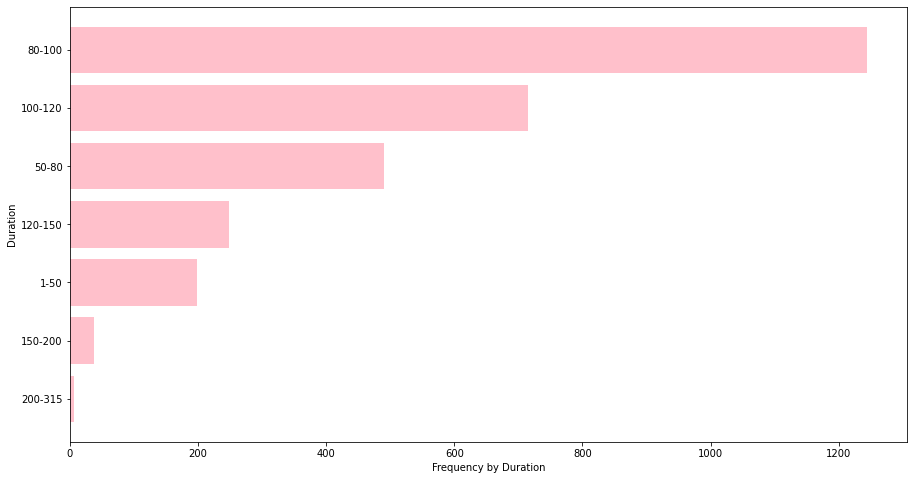

In [83]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

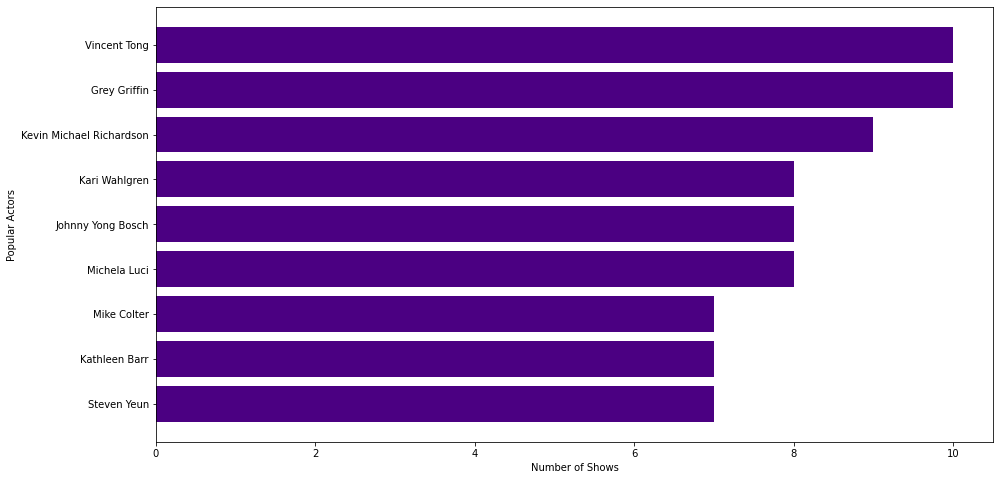

In [84]:
df_actors=df_usa_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Vincent Tong,Grey Griffin and Kevin Richardson are the most popular actors across TV Shows in USA

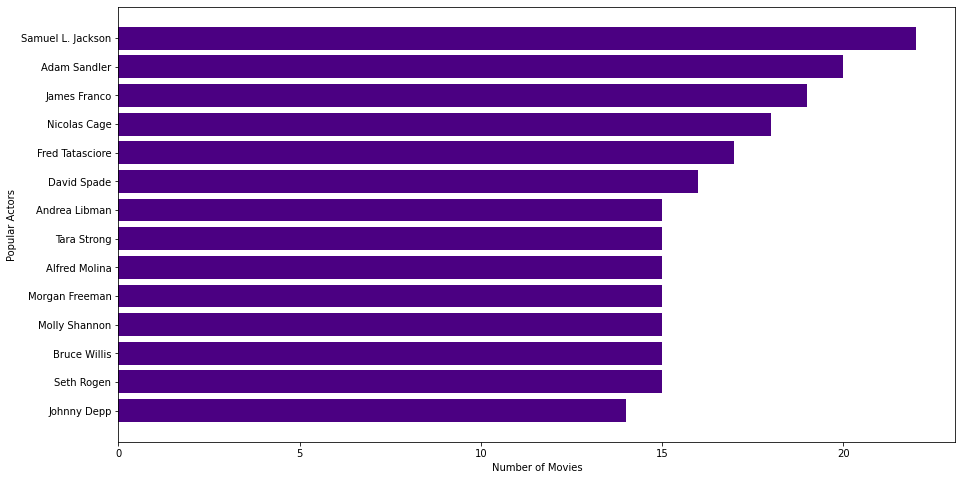

In [85]:
df_actors=df_usa_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Samuel Jackson,Adam Sandler,James Franco and Nicolas Cage are very much popular across movies on Netflix in USA

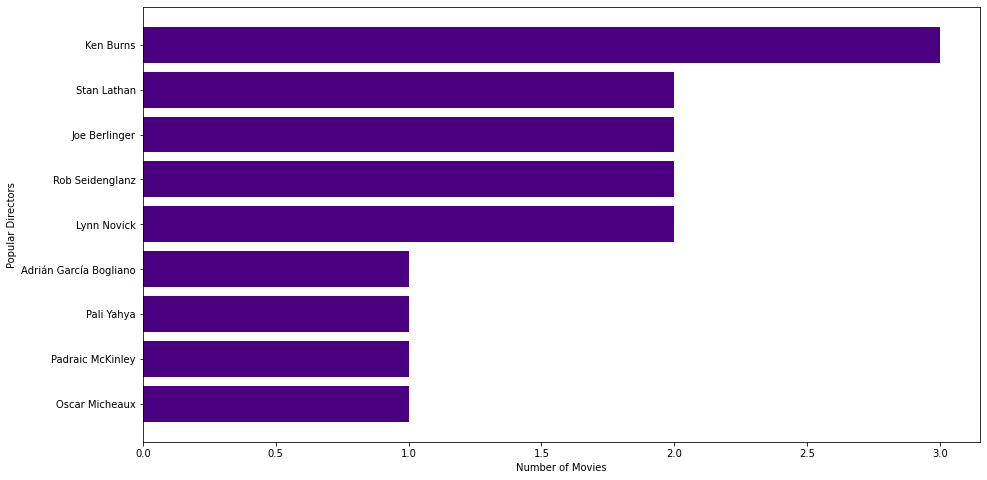

In [86]:
df_directors=df_usa_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix in USA

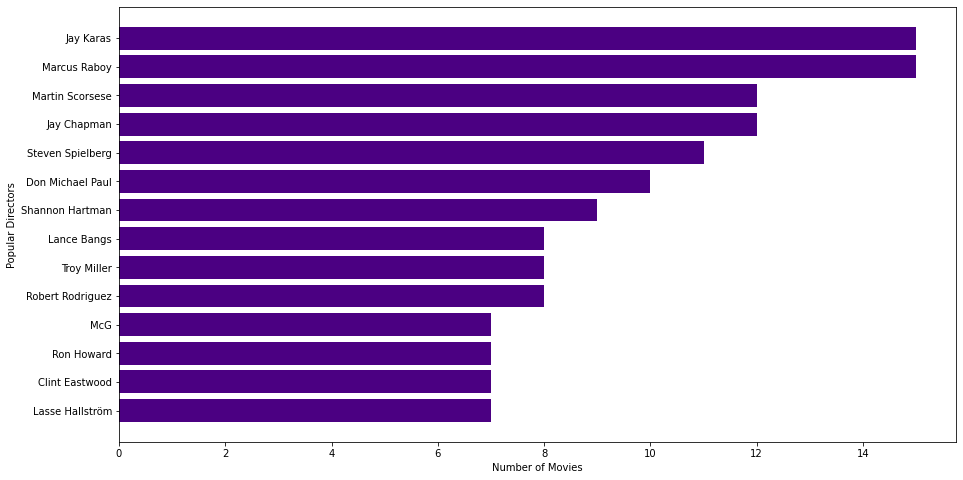

In [87]:
df_directors=df_usa_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

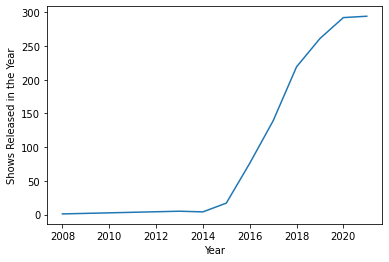

In [88]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

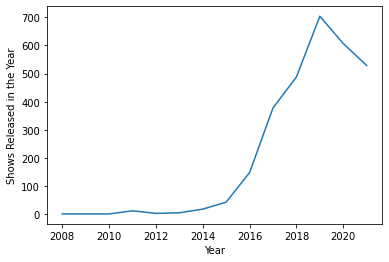

In [89]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of shows remained the same in 2021 as they were in 2020 while number of movies declined:

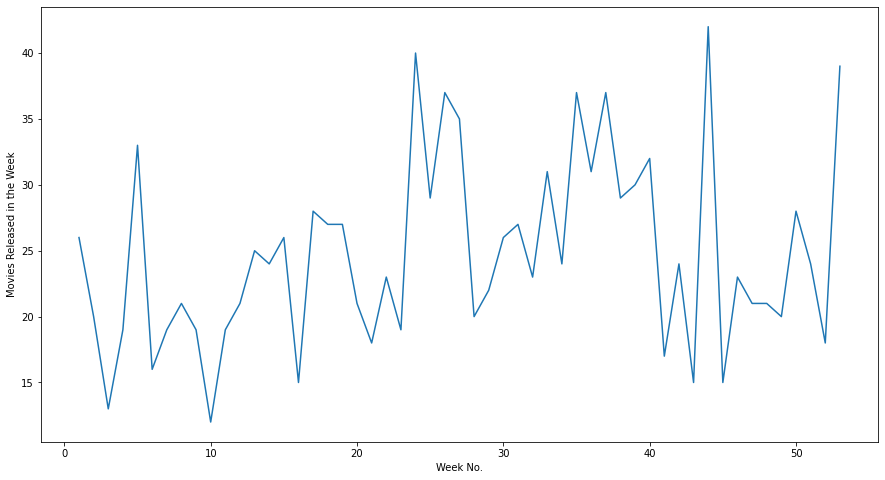

In [90]:
df_week=df_usa_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

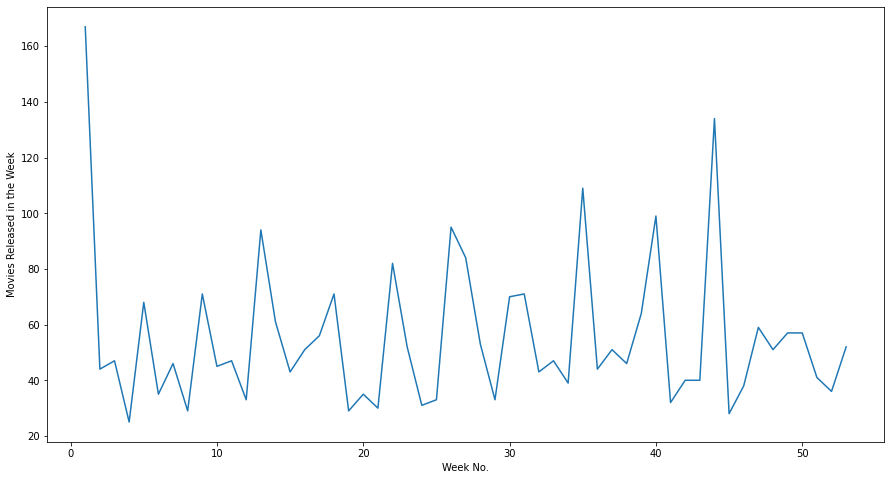

In [91]:
df_week=df_usa_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

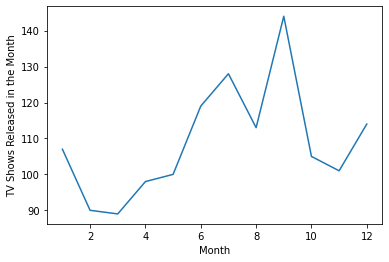

In [92]:
df_month=df_usa_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

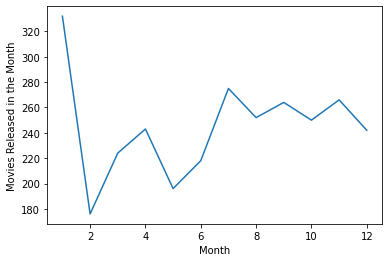

In [93]:
df_month=df_usa_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in July and September in USA

Movies are added in Netflix in USA by a tremendous amount in first week/last month of current year and first month of next year

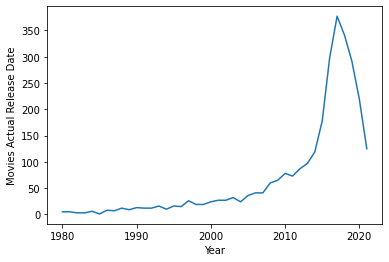

In [94]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

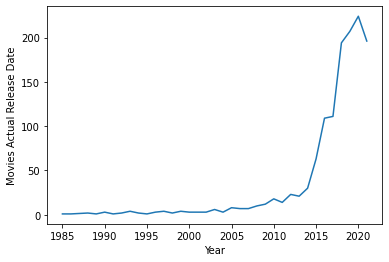

In [95]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In USA, though both Movies and Shows have reduced in 2021, the amount of decrease in number of TV Shows is small as compared to Movies

In [96]:
df_usa_movies.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021


In [97]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.Actors.str.cat(df_usa_movies.Directors, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['Actors']!='Unknown Actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['Directors']!='Unknown Director']
df_usa_movies_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021,Vanessa Hudgens and Robert Cullen
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021,Vanessa Hudgens and José Luis Ucha
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021,Kimiko Glenn and Robert Cullen
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021,Kimiko Glenn and José Luis Ucha
163,My Little Pony: A New Generation,James Marsden,Robert Cullen,Children & Family Movies,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021,James Marsden and Robert Cullen


In [98]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.Actors.str.cat(df_usa_shows.Directors, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['Actors']!='Unknown Actor']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['Directors']!='Unknown Director']
df_usa_shows_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
111,Midnight Mass,Kate Siegel,Mike Flanagan,TV Dramas,United States,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
112,Midnight Mass,Kate Siegel,Mike Flanagan,TV Horror,United States,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
113,Midnight Mass,Kate Siegel,Mike Flanagan,TV Mysteries,United States,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,9,38,2021,Kate Siegel and Mike Flanagan
114,Midnight Mass,Zach Gilford,Mike Flanagan,TV Dramas,United States,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,9,38,2021,Zach Gilford and Mike Flanagan
115,Midnight Mass,Zach Gilford,Mike Flanagan,TV Horror,United States,s6,TV Show,"September 24, 2021",2021,TV-MA,1 Season,2021-09-24,9,38,2021,Zach Gilford and Mike Flanagan


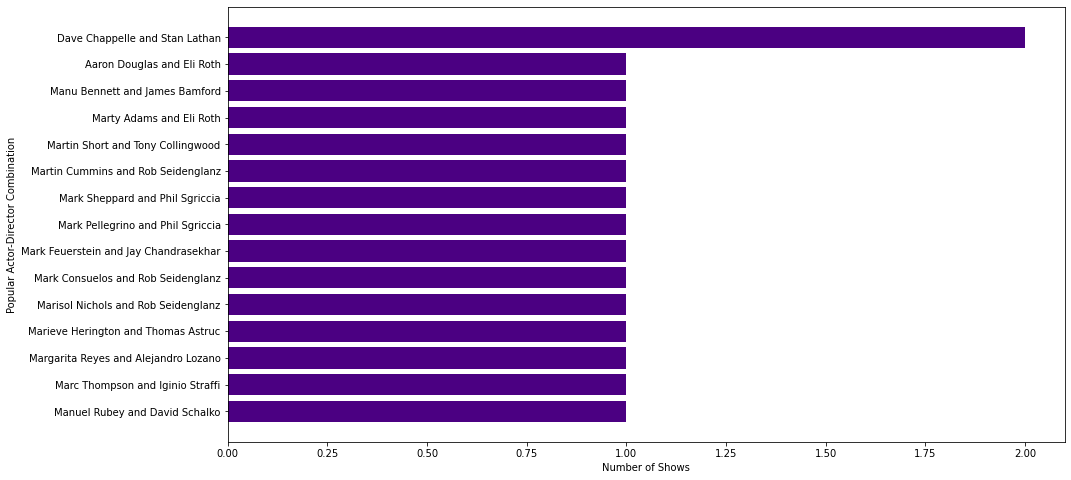

In [99]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

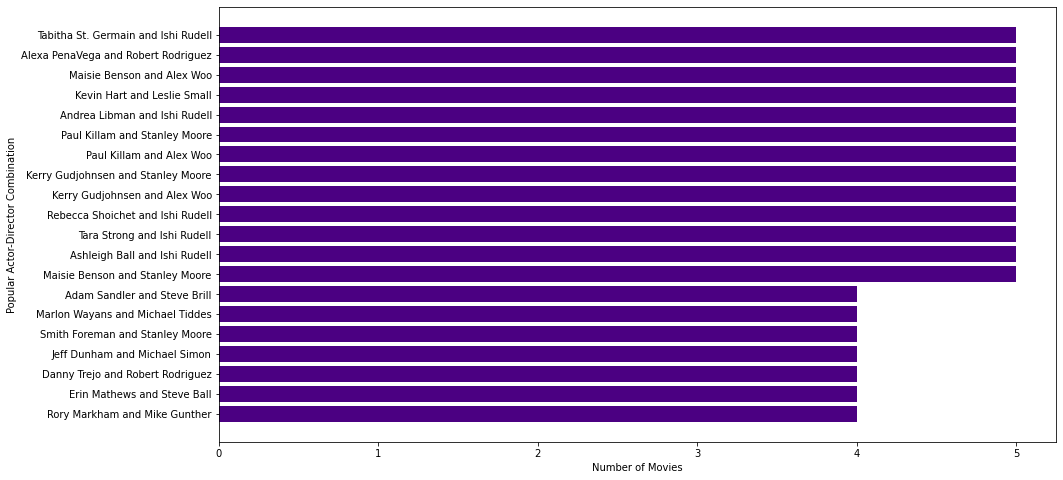

In [100]:
df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [101]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Rory Markham and Mike Gunther', 'Erin Mathews and Steve Ball',
       'Danny Trejo and Robert Rodriguez',
       'Jeff Dunham and Michael Simon', 'Smith Foreman and Stanley Moore',
       'Marlon Wayans and Michael Tiddes', 'Adam Sandler and Steve Brill',
       'Maisie Benson and Stanley Moore', 'Ashleigh Ball and Ishi Rudell',
       'Tara Strong and Ishi Rudell', 'Rebecca Shoichet and Ishi Rudell',
       'Kerry Gudjohnsen and Alex Woo',
       'Kerry Gudjohnsen and Stanley Moore', 'Paul Killam and Alex Woo',
       'Paul Killam and Stanley Moore', 'Andrea Libman and Ishi Rudell',
       'Kevin Hart and Leslie Small', 'Maisie Benson and Alex Woo',
       'Alexa PenaVega and Robert Rodriguez',
       'Tabitha St. Germain and Ishi Rudell'], dtype=object)

**The Most Popular Actor Director Combination in Movies Across USA are:-**

'Smith Foreman and Stanley Moore',
<br>
'Marlon Wayans and Michael Tiddes', 
<br>
'Adam Sandler and Steve Brill',
<br>
'Maisie Benson and Stanley Moore',
<br>
'Ashleigh Ball and Ishi Rudell',
<br>
'Tara Strong and Ishi Rudell',
<br> 
'Rebecca Shoichet and Ishi Rudell',
<br>
'Kerry Gudjohnsen and Alex Woo',
<br>
'Kerry Gudjohnsen and Stanley Moore',
<br> 
'Paul Killam and Alex Woo',
<br>
'Paul Killam and Stanley Moore',
<br> 
'Andrea Libman and Ishi Rudell',
<br>
'Kevin Hart and Leslie Small', 
<br>
'Maisie Benson and Alex Woo',
<br>
'Alexa PenaVega and Robert Rodriguez',
<br>
'Tabitha St. Germain and Ishi Rudell'







**The Second Most Popular Actor Director Combination in Movies Across USA are:-**
<br>
'Rory Markham and Mike Gunther', 
<br>
'Erin Mathews and Steve Ball',
<br>
'Danny Trejo and Robert Rodriguez',
<br>
'Jeff Dunham and Michael Simon'
<br>


#### Univariate Analysis separately for shows and movies in India
---



In [102]:
#Analyzing India for both shows and movies
df_india_shows=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='TV Show']
df_india_movies=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='Movie']

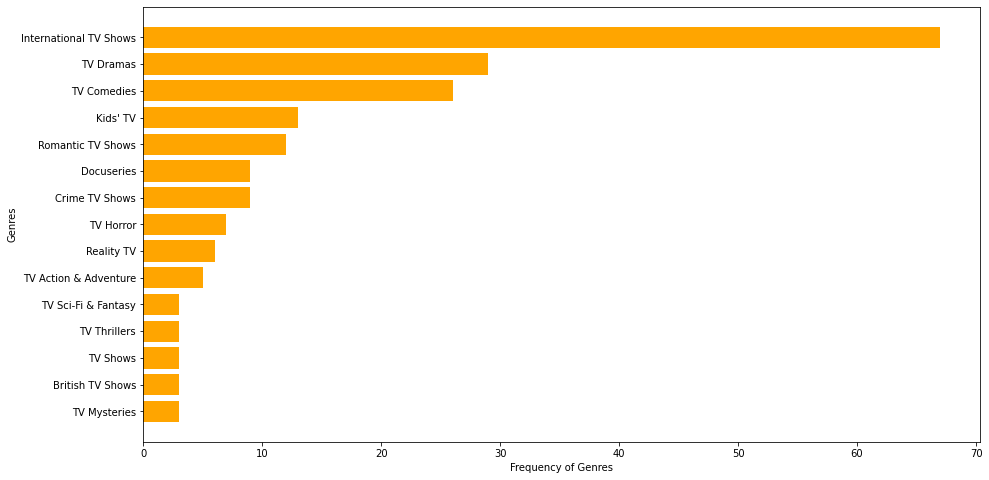

In [103]:
df_genre=df_india_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India

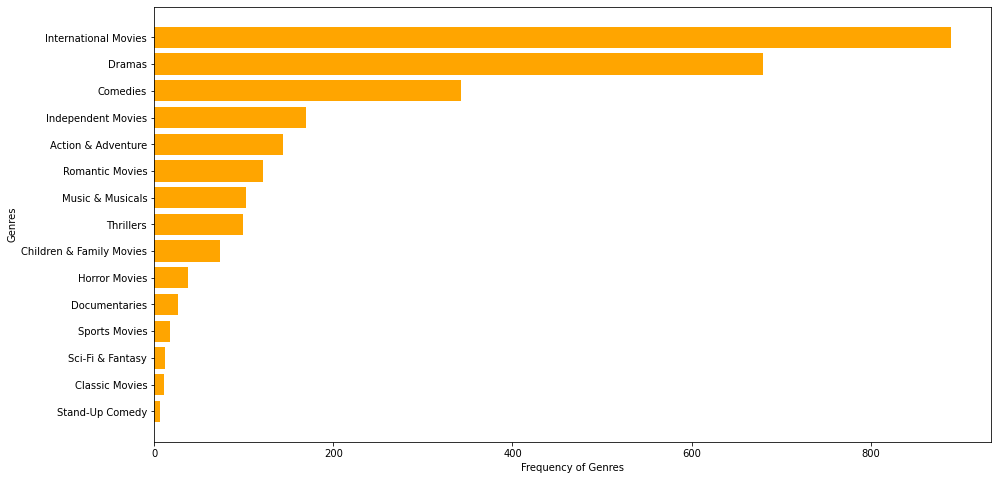

In [104]:
df_genre=df_india_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

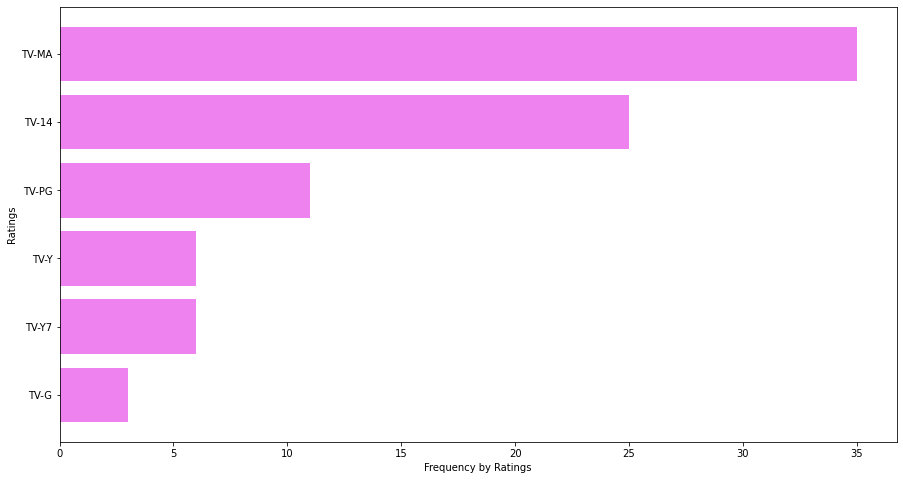

In [105]:
df_rating=df_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

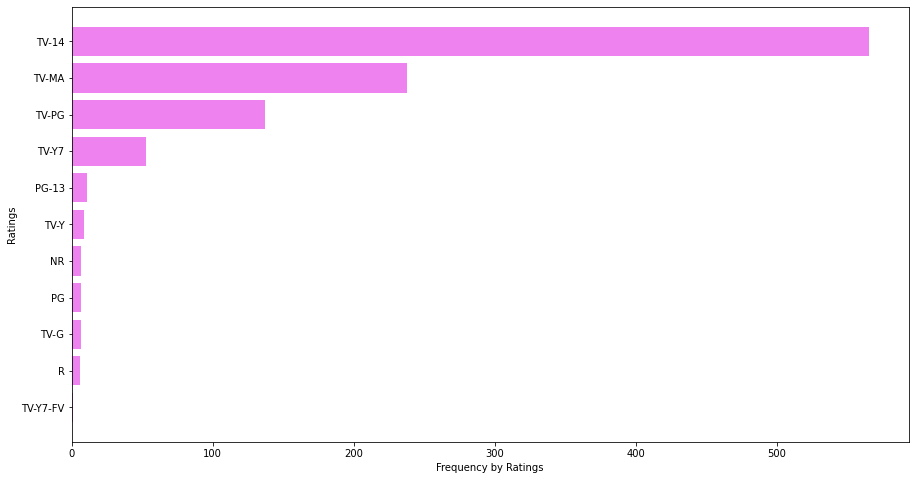

In [106]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies in India.

Now this indeed seems to be the case. Indian TV Shows in Netflix are without a shadow of doubt intended for Mature Audiences while Movies for over 14 years of age.

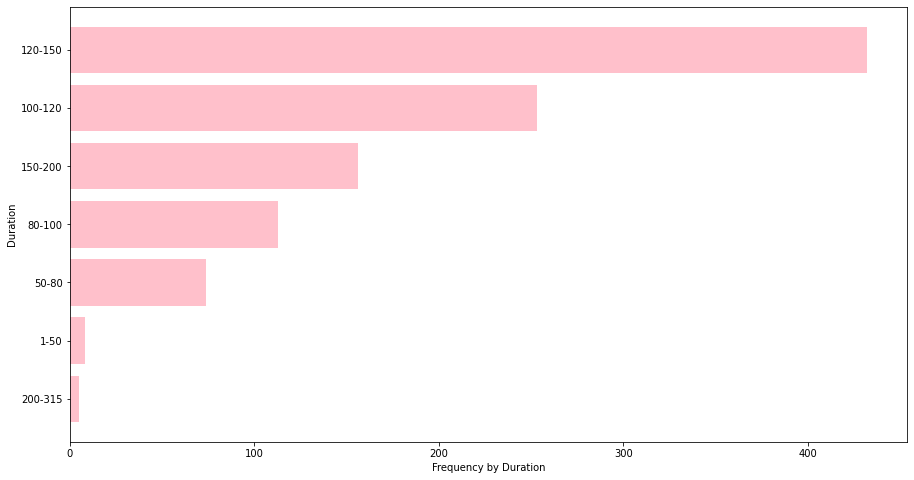

In [107]:
df_duration=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in India are comparatively greater than USA with a sweet spot at 120-150 mins.

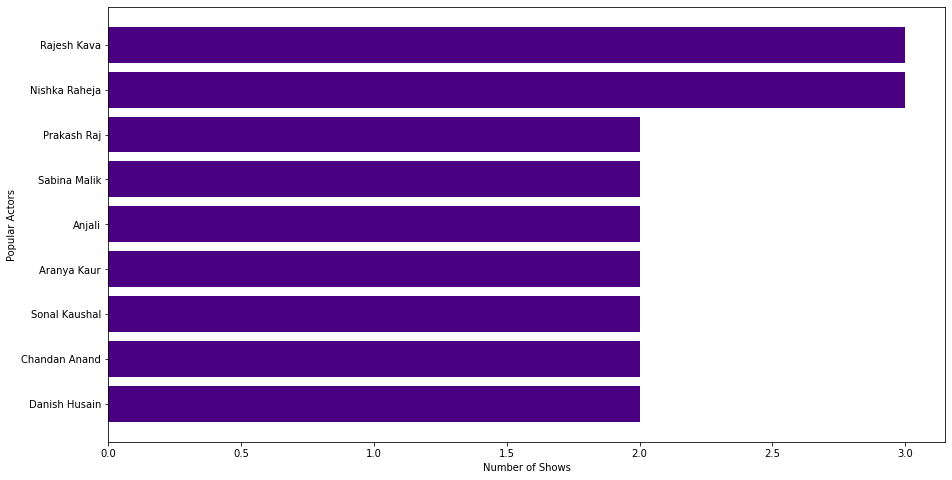

In [108]:
df_actors=df_india_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [109]:
df_actors['Actors'].values

array(['Rajesh Kava', 'Nishka Raheja', 'Prakash Raj', 'Sabina Malik',
       'Anjali', 'Aranya Kaur', 'Sonal Kaushal', 'Chandan Anand',
       'Danish Husain'], dtype=object)

**Popular Actors in TV Shows in India are:-**
<br>
'Rajesh Kava', 
<br>
'Nishka Raheja',
<br>
'Prakash Raj', 
<br>
'Sabina Malik',
<br>
'Anjali', 
<br>
'Aranya Kaur',
<br> 
'Sonal Kaushal',
<br>
'Chandan Anand',
<br>
'Danish Husain'

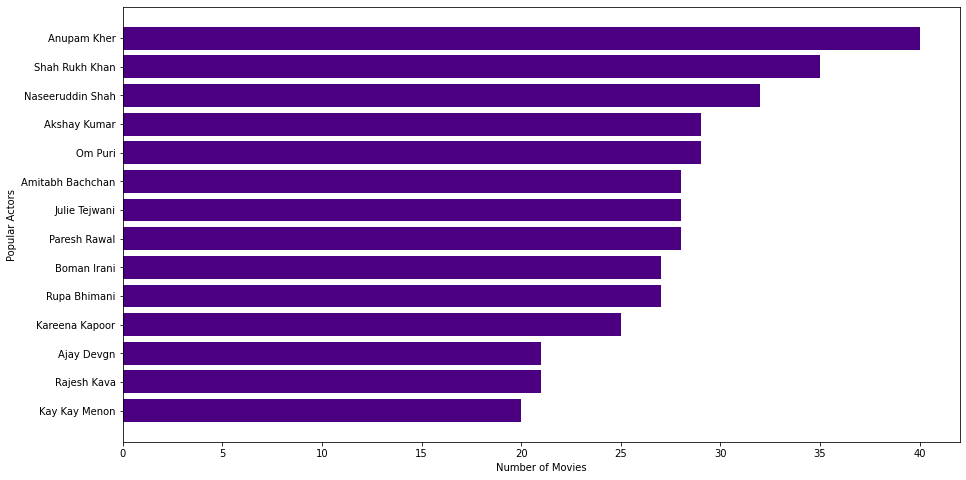

In [110]:
df_actors=df_india_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [111]:
df_actors['Actors'].values

array(['Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah',
       'Akshay Kumar', 'Om Puri', 'Amitabh Bachchan', 'Julie Tejwani',
       'Paresh Rawal', 'Boman Irani', 'Rupa Bhimani', 'Kareena Kapoor',
       'Ajay Devgn', 'Rajesh Kava', 'Kay Kay Menon'], dtype=object)

**Popular actors across Movies in India:-**
<br>
'Anupam Kher',
<br>
'Shah Rukh Khan',
<br> 
'Naseeruddin Shah',
<br>
'Akshay Kumar',
<br>
'Om Puri', 
<br>
'Paresh Rawal',
<br>
'Julie Tejwani',
<br>
'Amitabh Bachchan',
<br>
'Boman Irani',
<br>
'Rupa Bhimani',
<br>
'Kareena Kapoor',
<br>
'Ajay Devgn', 
<br>
'Rajesh Kava',
<br>
'Kay Kay Menon'

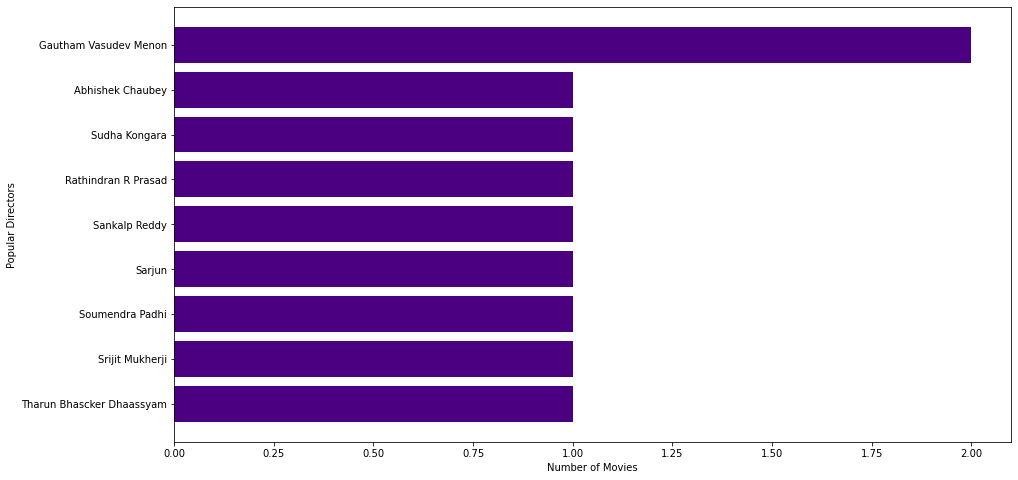

In [112]:
df_directors=df_india_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [113]:
df_directors['Directors'].values

array(['Gautham Vasudev Menon', 'Abhishek Chaubey', 'Sudha Kongara',
       'Rathindran R Prasad', 'Sankalp Reddy', 'Sarjun',
       'Soumendra Padhi', 'Srijit Mukherji', 'Tharun Bhascker Dhaassyam'],
      dtype=object)

**Popular Directors Across Movies in India:-**
<br>
'Gautham Vasudev Menon',
<br>
'Abhishek Chaubey',
<br>
'Sudha Kongara',
<br>
'Rathindran R Prasad',
<br>
'Sankalp Reddy',
<br>
'Sarjun',
<br>
'Soumendra Padhi',
<br>
'Srijit Mukherji',
<br>
'Tharun Bhascker Dhaassyam'

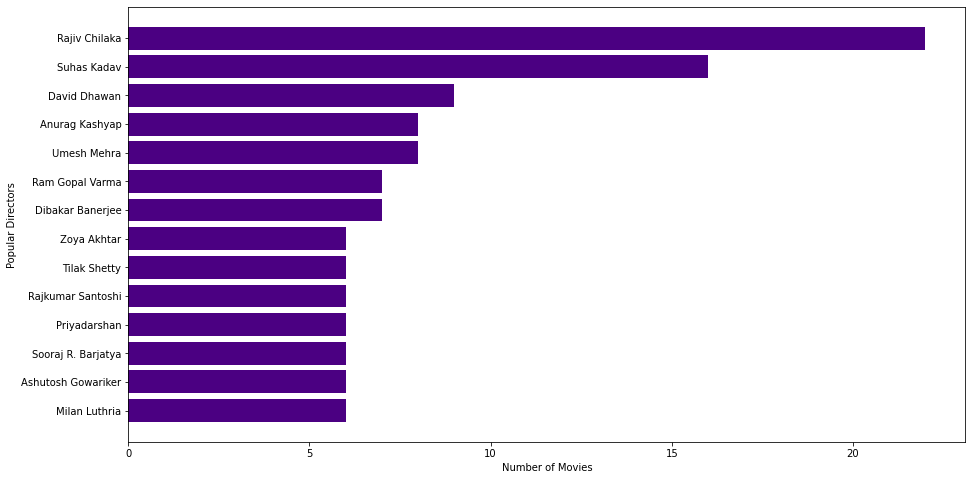

In [114]:
df_directors=df_india_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [115]:
df_directors['Directors'].values

array(['Rajiv Chilaka', 'Suhas Kadav', 'David Dhawan', 'Anurag Kashyap',
       'Umesh Mehra', 'Ram Gopal Varma', 'Dibakar Banerjee',
       'Zoya Akhtar', 'Tilak Shetty', 'Rajkumar Santoshi', 'Priyadarshan',
       'Sooraj R. Barjatya', 'Ashutosh Gowariker', 'Milan Luthria'],
      dtype=object)

**Popular directors across movies in India:-**
<br>
'Rajiv Chilaka',
<br>
'Suhas Kadav',
<br>
'David Dhawan',
<br>
'Umesh Mehra',
<br>
'Anurag Kashyap',
<br>
'Ram Gopal Varma',
<br>
'Dibakar Banerjee',
<br>
'Zoya Akhtar',
<br>
'Tilak Shetty',
<br>
'Rajkumar Santoshi',
<br>
'Priyadarshan',
<br>
'Sooraj R. Barjatya',
<br>
'Ashutosh Gowariker',
<br>
'Milan Luthria'

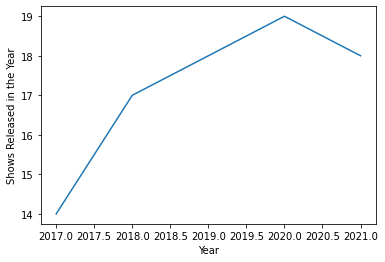

In [116]:
df_year=df_india_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

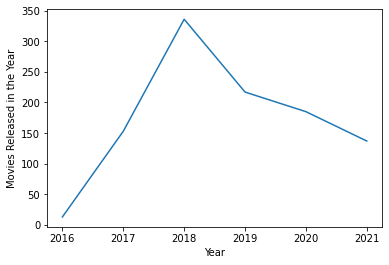

In [117]:
df_year=df_india_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In India,TV Shows were increasingly being added till 2020, though the addition of shows reduced in 2021.

In India, Movies were increasingly added till 2018 but it has been a huge downhill since then. Now that's preposterous, since and soemthing has to be recommended to the Netflix Team with regards to that.

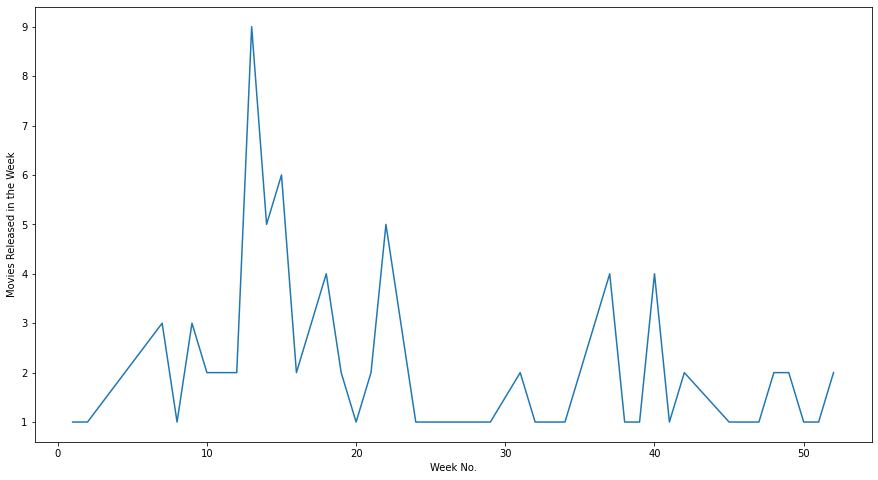

In [118]:
df_week=df_india_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

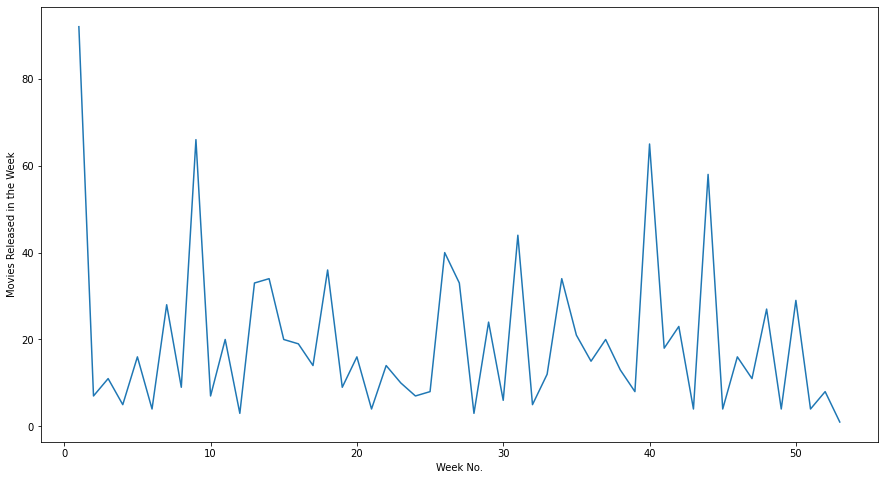

In [119]:
df_week=df_india_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

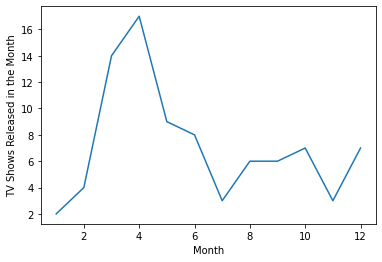

In [120]:
df_month=df_india_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

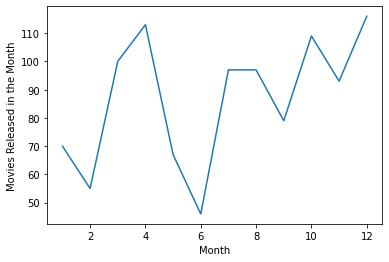

In [121]:
df_month=df_india_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in April in India

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

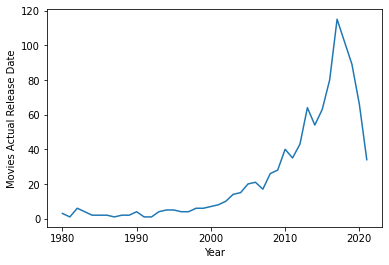

In [122]:
df_release_year=df_india_movies[df_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

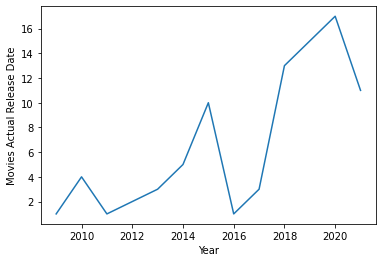

In [123]:
df_release_year=df_india_shows[df_india_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

The understandable trend amongs movies and TV Shows across India in Netflix is the reduction of movies after 2020

In [124]:
#Analysing a combination of actors and directors
df_india_movies['Actor_Director_Combination'] = df_india_movies.Actors.str.cat(df_india_movies.Directors, sep=' and ')
df_india_movies_subset=df_india_movies[df_india_movies['Actors']!='Unknown Actor']
df_india_movies_subset=df_india_movies_subset[df_india_movies_subset['Directors']!='Unknown Director']
df_india_movies_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
621,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,Comedies,India,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,9,38,2021,Kamal Hassan and K.S. Ravikumar
622,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,International Movies,India,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,9,38,2021,Kamal Hassan and K.S. Ravikumar
629,Avvai Shanmughi,Nassar,K.S. Ravikumar,Comedies,India,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,9,38,2021,Nassar and K.S. Ravikumar
630,Avvai Shanmughi,Nassar,K.S. Ravikumar,International Movies,India,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,9,38,2021,Nassar and K.S. Ravikumar
631,Avvai Shanmughi,S.P. Balasubrahmanyam,K.S. Ravikumar,Comedies,India,s23,Movie,"September 21, 2021",1996,TV-PG,150-200,2021-09-21,9,38,2021,S.P. Balasubrahmanyam and K.S. Ravikumar


In [125]:
df_india_shows['Actor_Director_Combination'] = df_india_shows.Actors.str.cat(df_india_shows.Directors, sep=' and ')
df_india_shows_subset=df_india_shows[df_india_shows['Actors']!='Unknown Actor']
df_india_shows_subset=df_india_shows_subset[df_india_shows_subset['Directors']!='Unknown Director']
df_india_shows_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
7005,Navarasa,Suriya,Bejoy Nambiar,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,8,31,2021,Suriya and Bejoy Nambiar
7006,Navarasa,Suriya,Priyadarshan,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,8,31,2021,Suriya and Priyadarshan
7007,Navarasa,Suriya,Karthik Narain,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,8,31,2021,Suriya and Karthik Narain
7008,Navarasa,Suriya,Vasanth Sai,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,8,31,2021,Suriya and Vasanth Sai
7009,Navarasa,Suriya,Karthik Subbaraj,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,2021-08-06,8,31,2021,Suriya and Karthik Subbaraj


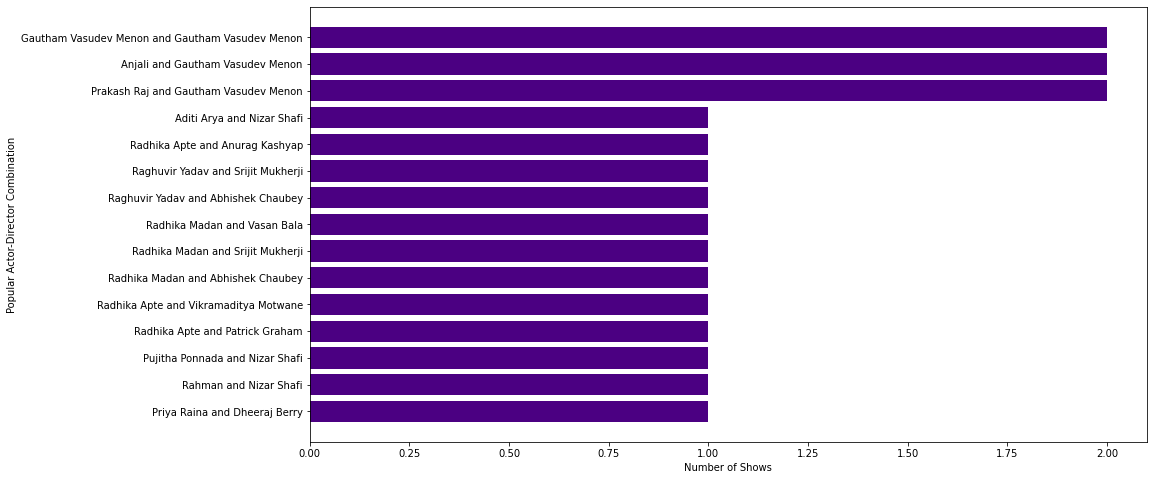

In [126]:
df_actors_directors=df_india_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

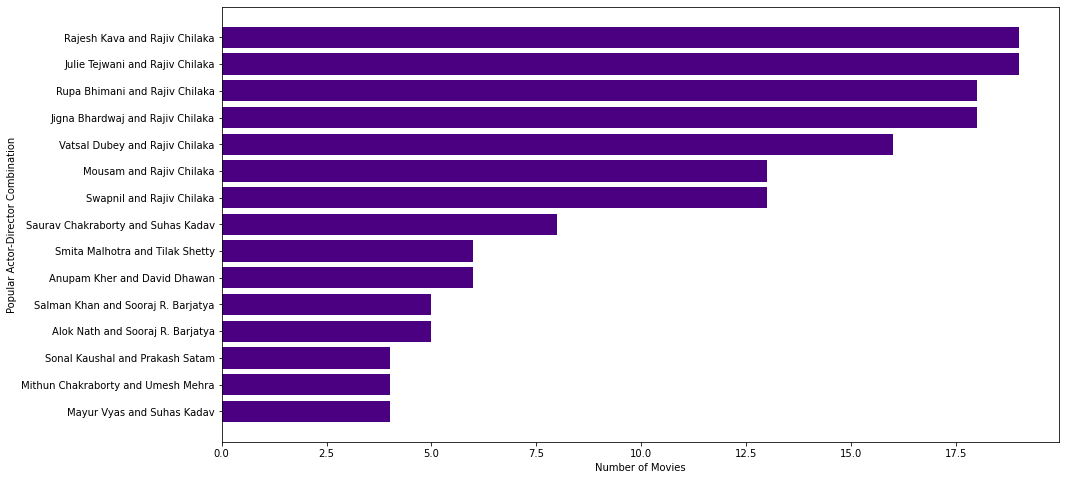

In [127]:
df_actors_directors=df_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [128]:
df_india_movies[df_india_movies['Directors']=='Rajiv Chilaka']

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
10058,Chhota Bheem - Neeli Pahaadi,Vatsal Dubey,Rajiv Chilaka,Children & Family Movies,India,s407,Movie,"July 22, 2021",2013,TV-Y7,50-80,2021-07-22,7,29,2021,Vatsal Dubey and Rajiv Chilaka
10059,Chhota Bheem - Neeli Pahaadi,Julie Tejwani,Rajiv Chilaka,Children & Family Movies,India,s407,Movie,"July 22, 2021",2013,TV-Y7,50-80,2021-07-22,7,29,2021,Julie Tejwani and Rajiv Chilaka
10060,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani,Rajiv Chilaka,Children & Family Movies,India,s407,Movie,"July 22, 2021",2013,TV-Y7,50-80,2021-07-22,7,29,2021,Rupa Bhimani and Rajiv Chilaka
10061,Chhota Bheem - Neeli Pahaadi,Jigna Bhardwaj,Rajiv Chilaka,Children & Family Movies,India,s407,Movie,"July 22, 2021",2013,TV-Y7,50-80,2021-07-22,7,29,2021,Jigna Bhardwaj and Rajiv Chilaka
10062,Chhota Bheem - Neeli Pahaadi,Rajesh Kava,Rajiv Chilaka,Children & Family Movies,India,s407,Movie,"July 22, 2021",2013,TV-Y7,50-80,2021-07-22,7,29,2021,Rajesh Kava and Rajiv Chilaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145810,Chhota Bheem Kungfu Dhamaka,Vaibhav Thakkar,Rajiv Chilaka,Children & Family Movies,India,s6465,Movie,"August 15, 2019",2019,TV-Y7,100-120,2019-08-15,8,33,2019,Vaibhav Thakkar and Rajiv Chilaka
145812,Chhota Bheem Kungfu Dhamaka,Samriddhi Shuklaa,Rajiv Chilaka,Children & Family Movies,India,s6465,Movie,"August 15, 2019",2019,TV-Y7,100-120,2019-08-15,8,33,2019,Samriddhi Shuklaa and Rajiv Chilaka
145814,Chhota Bheem Kungfu Dhamaka,Aditya Raj Sharma,Rajiv Chilaka,Children & Family Movies,India,s6465,Movie,"August 15, 2019",2019,TV-Y7,100-120,2019-08-15,8,33,2019,Aditya Raj Sharma and Rajiv Chilaka
145816,Chhota Bheem Kungfu Dhamaka,Vinod Kulkarni,Rajiv Chilaka,Children & Family Movies,India,s6465,Movie,"August 15, 2019",2019,TV-Y7,100-120,2019-08-15,8,33,2019,Vinod Kulkarni and Rajiv Chilaka


It seems that Rajiv Chilaka has worked on Chota Bheem and has been able to create some good content in its movies. He can be relied on for more Chota Bheem stories

In [129]:
df_actors_directors['Actor_Director_Combination'].values

array(['Rajesh Kava and Rajiv Chilaka', 'Julie Tejwani and Rajiv Chilaka',
       'Rupa Bhimani and Rajiv Chilaka',
       'Jigna Bhardwaj and Rajiv Chilaka',
       'Vatsal Dubey and Rajiv Chilaka', 'Mousam and Rajiv Chilaka',
       'Swapnil and Rajiv Chilaka', 'Saurav Chakraborty and Suhas Kadav',
       'Smita Malhotra and Tilak Shetty', 'Anupam Kher and David Dhawan',
       'Salman Khan and Sooraj R. Barjatya',
       'Alok Nath and Sooraj R. Barjatya',
       'Sonal Kaushal and Prakash Satam',
       'Mithun Chakraborty and Umesh Mehra', 'Mayur Vyas and Suhas Kadav'],
      dtype=object)

**The Most Popular Actor Director Combination in Movies Across India are:-**
<br>
'Rajesh Kava and Rajiv Chilaka',
<br>
'Julie Tejwani and Rajiv Chilaka',
<br>
'Rupa Bhimani and Rajiv Chilaka',
<br>
'Jigna Bhardwaj and Rajiv Chilaka',
<br>
'Vatsal Dubey and Rajiv Chilaka',
<br>
'Mousam and Rajiv Chilaka',
<br>
'Swapnil and Rajiv Chilaka',
<br>
'Saurav Chakraborty and Suhas Kadav',
<br>
'Smita Malhotra and Tilak Shetty',
<br>
'Anupam Kher and David Dhawan',
<br>
'Salman Khan and Sooraj R. Barjatya',

#### Univariate Analysis separately for shows and movies in United Kingdom
---



In [130]:
#Analyzing India for both shows and movies
df_uk_shows=df_final1[df_final1['country']=='United Kingdom'][df_final1[df_final1['country']=='United Kingdom']['type']=='TV Show']
df_uk_movies=df_final1[df_final1['country']=='United Kingdom'][df_final1[df_final1['country']=='United Kingdom']['type']=='Movie']

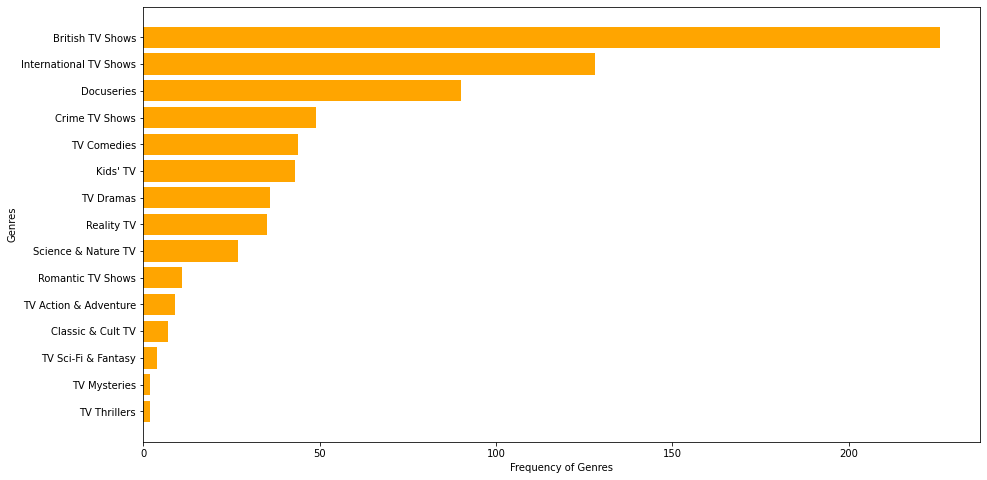

In [131]:
df_genre=df_uk_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

British TV Shows,International TV Shows,Docuseries, Crime, Comedy are widely watched Genres in TV Shows in UK

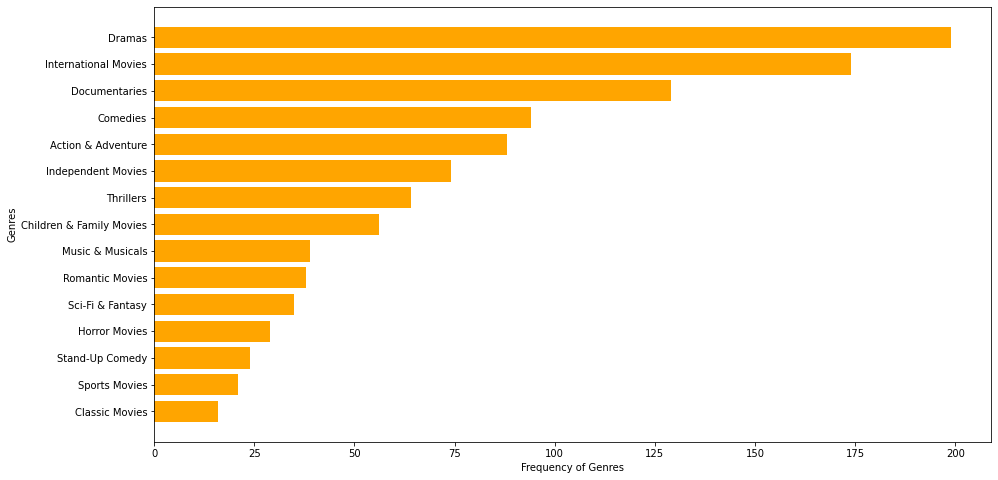

In [132]:
df_genre=df_uk_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres in Movies are prevalent in UK

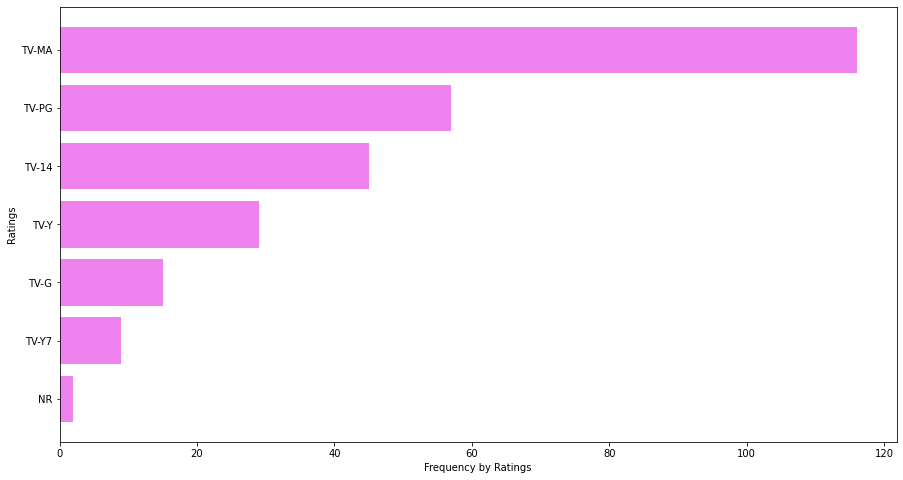

In [133]:
df_rating=df_uk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

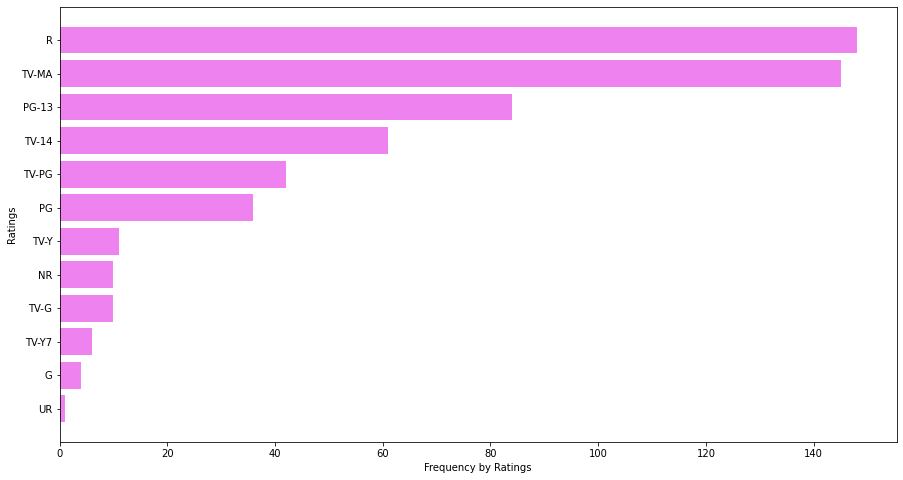

In [134]:
df_rating=df_uk_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Parental Guidance and Mature Audiences in TV Shows and R Rated+MA Rated in Movies in UK


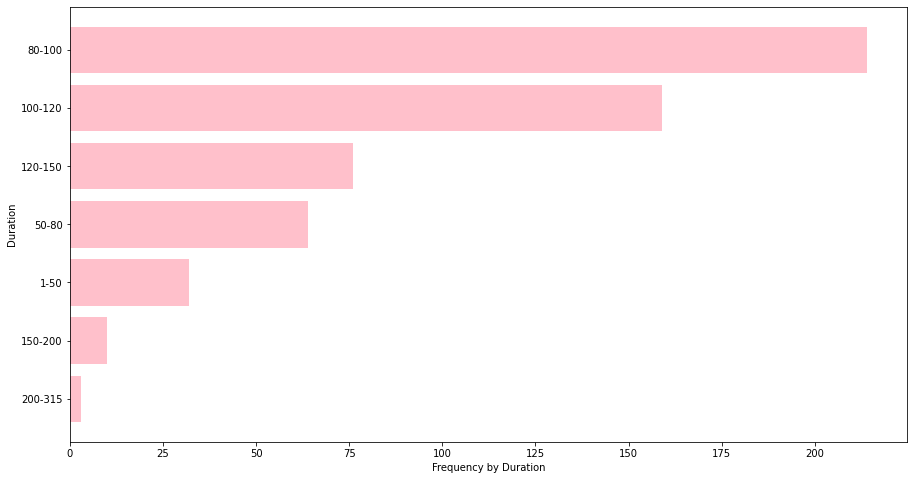

In [135]:
df_duration=df_uk_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in UK have a sweet spot at 80-120 mins.

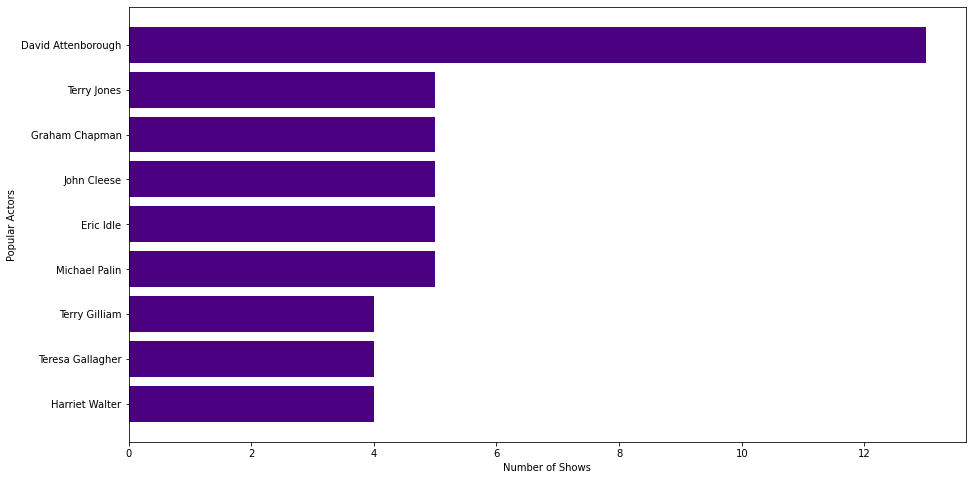

In [136]:
df_actors=df_uk_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [137]:
df_actors['Actors'].values

array(['David Attenborough', 'Terry Jones', 'Graham Chapman',
       'John Cleese', 'Eric Idle', 'Michael Palin', 'Terry Gilliam',
       'Teresa Gallagher', 'Harriet Walter'], dtype=object)

**Popular Actors in TV Shows in UK are:-**
<br>
'David Attenborough', 
<br>
'Terry Jones',
<br>
'Graham Chapman', 
<br>
'John Cleese',
<br>
'Eric Idle', 
<br>
'Michael Palin',
<br> 
'Terry Gilliam',
<br>
'Teresa Gallagher',
<br>
'Harriet Walter'

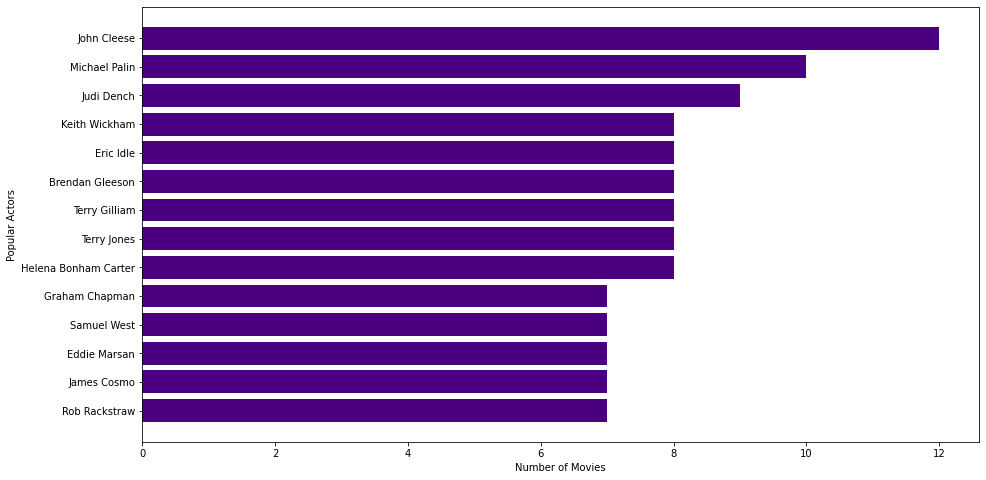

In [138]:
df_actors=df_uk_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [139]:
df_actors['Actors'].values

array(['John Cleese', 'Michael Palin', 'Judi Dench', 'Keith Wickham',
       'Eric Idle', 'Brendan Gleeson', 'Terry Gilliam', 'Terry Jones',
       'Helena Bonham Carter', 'Graham Chapman', 'Samuel West',
       'Eddie Marsan', 'James Cosmo', 'Rob Rackstraw'], dtype=object)

**Popular actors across Movies in UK:-**
<br>
'John Cleese', 
<br>
'Michael Palin',
<br>
'Judi Dench',
<br>
'Keith Wickham',
<br>
'Eric Idle',
<br>
'Brendan Gleeson',
<br>
'Terry Gilliam',
<br>
'Terry Jones',
<br>
'Helena Bonham Carter',
<br>
'Graham Chapman',
<br>
'Samuel West',
<br>
'Eddie Marsan',
<br>
'James Cosmo',
<br>
'Rob Rackstraw'


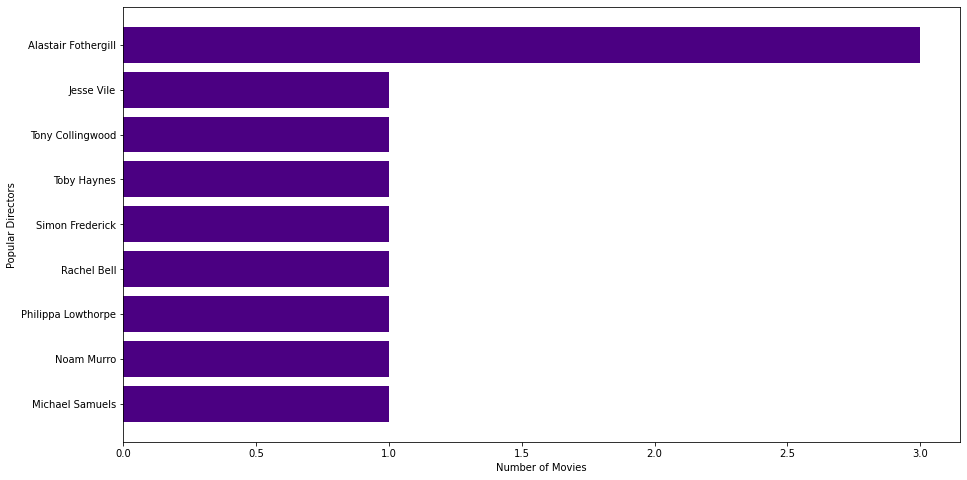

In [140]:
df_directors=df_uk_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [141]:
df_directors['Directors'].values

array(['Alastair Fothergill', 'Jesse Vile', 'Tony Collingwood',
       'Toby Haynes', 'Simon Frederick', 'Rachel Bell',
       'Philippa Lowthorpe', 'Noam Murro', 'Michael Samuels'],
      dtype=object)

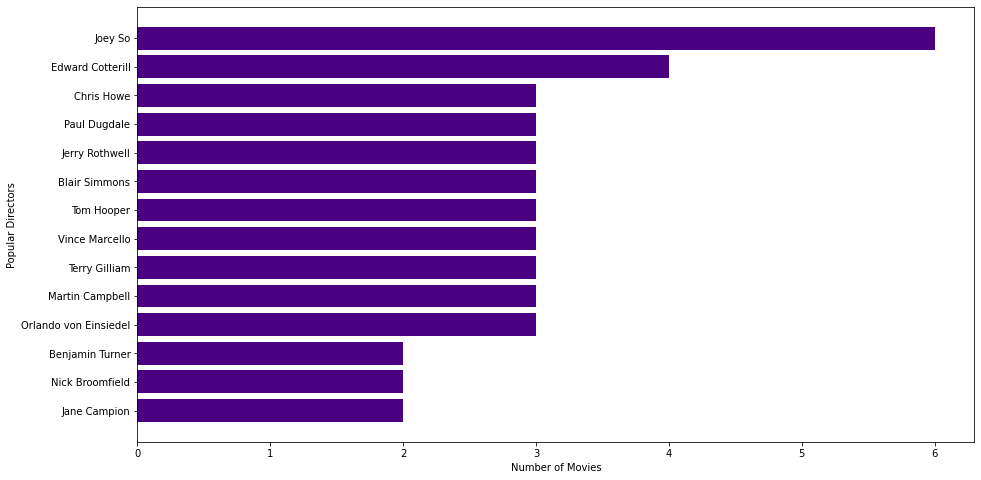

In [142]:
df_directors=df_uk_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [143]:
df_directors['Directors'].values

array(['Joey So', 'Edward Cotterill', 'Chris Howe', 'Paul Dugdale',
       'Jerry Rothwell', 'Blair Simmons', 'Tom Hooper', 'Vince Marcello',
       'Terry Gilliam', 'Martin Campbell', 'Orlando von Einsiedel',
       'Benjamin Turner', 'Nick Broomfield', 'Jane Campion'], dtype=object)

**Popular directors across movies in UK:-**
<br>
'Joey So',
<br>
'Edward Cotterill'


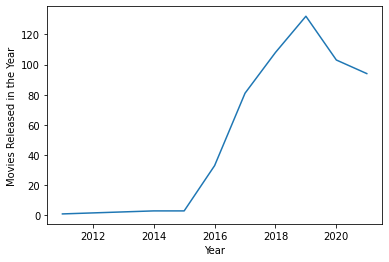

In [144]:
df_year=df_uk_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

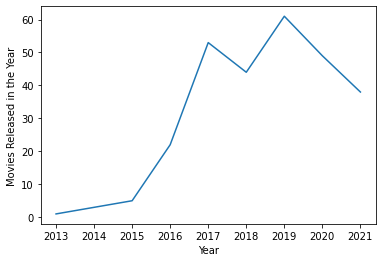

In [145]:
df_year=df_uk_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In terms of TV Shows, UK saw a downfall in 2018 from 2017, then a great increase in 2019 but has been reducing since then.

In terms of Movies,the number of popular movies in UK increased till 2019, since then it's decreasing.

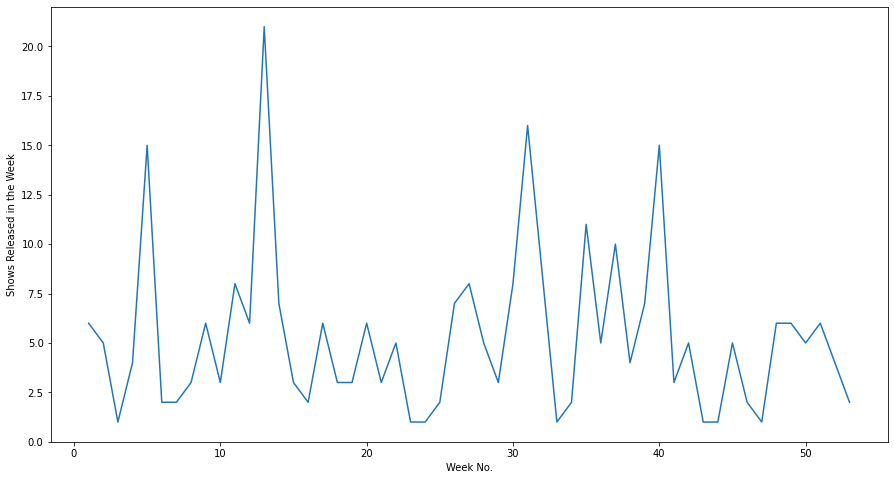

In [146]:
df_week=df_uk_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Shows Released in the Week")
plt.xlabel("Week No.")
plt.show()

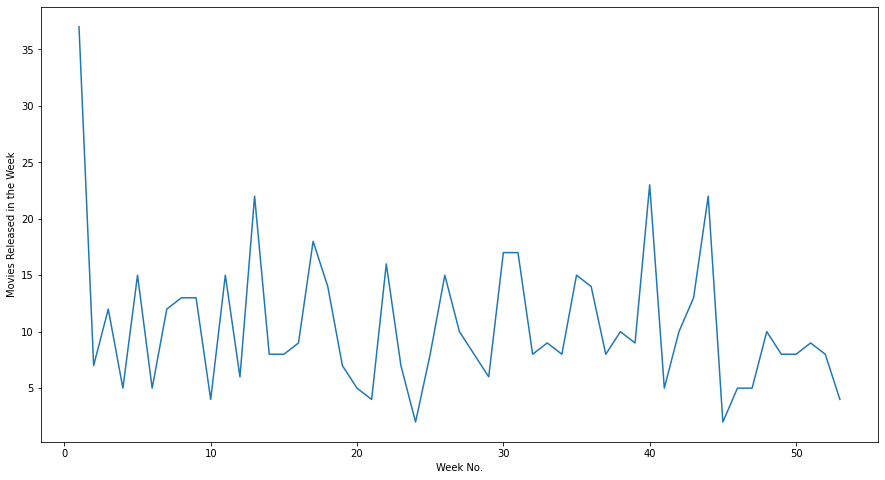

In [147]:
df_week=df_uk_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

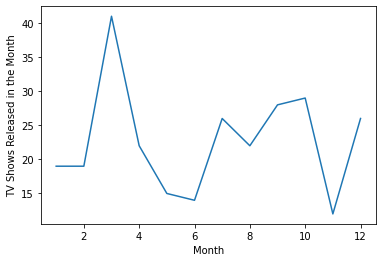

In [148]:
df_month=df_uk_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

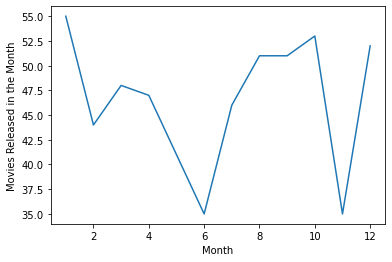

In [149]:
df_month=df_uk_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in March in UK

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

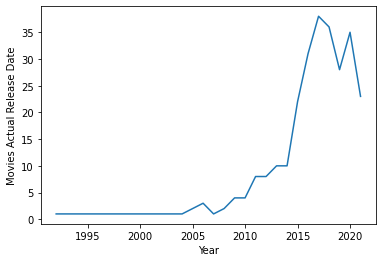

In [150]:
df_release_year=df_uk_shows[df_uk_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

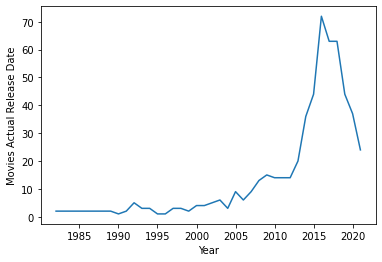

In [151]:
df_release_year=df_uk_movies[df_uk_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Same trend of reduction in movies and shows after 2020.

In [152]:
#Analysing a combination of actors and directors
df_uk_movies['Actor_Director_Combination'] = df_uk_movies.Actors.str.cat(df_uk_movies.Directors, sep=' and ')
df_uk_movies_subset=df_uk_movies[df_uk_movies['Actors']!='Unknown Actor']
df_uk_movies_subset=df_uk_movies_subset[df_uk_movies_subset['Directors']!='Unknown Director']
df_uk_movies_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
182,Sankofa,Kofi Ghanaba,Haile Gerima,Dramas,United Kingdom,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
188,Sankofa,Kofi Ghanaba,Haile Gerima,Independent Movies,United Kingdom,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
194,Sankofa,Kofi Ghanaba,Haile Gerima,International Movies,United Kingdom,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
200,Sankofa,Oyafunmike Ogunlano,Haile Gerima,Dramas,United Kingdom,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima
206,Sankofa,Oyafunmike Ogunlano,Haile Gerima,Independent Movies,United Kingdom,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima


In [153]:
df_uk_shows['Actor_Director_Combination'] = df_uk_shows.Actors.str.cat(df_uk_shows.Directors, sep=' and ')
df_uk_shows_subset=df_uk_shows[df_uk_shows['Actors']!='Unknown Actor']
df_uk_shows_subset=df_uk_shows_subset[df_uk_shows_subset['Directors']!='Unknown Director']
df_uk_shows_subset.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
323,The Great British Baking Show,Mel Giedroyc,Andy Devonshire,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,2021-09-24,9,38,2021,Mel Giedroyc and Andy Devonshire
324,The Great British Baking Show,Mel Giedroyc,Andy Devonshire,Reality TV,United Kingdom,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,2021-09-24,9,38,2021,Mel Giedroyc and Andy Devonshire
325,The Great British Baking Show,Sue Perkins,Andy Devonshire,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,2021-09-24,9,38,2021,Sue Perkins and Andy Devonshire
326,The Great British Baking Show,Sue Perkins,Andy Devonshire,Reality TV,United Kingdom,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,2021-09-24,9,38,2021,Sue Perkins and Andy Devonshire
327,The Great British Baking Show,Mary Berry,Andy Devonshire,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",2021,TV-14,9 Seasons,2021-09-24,9,38,2021,Mary Berry and Andy Devonshire


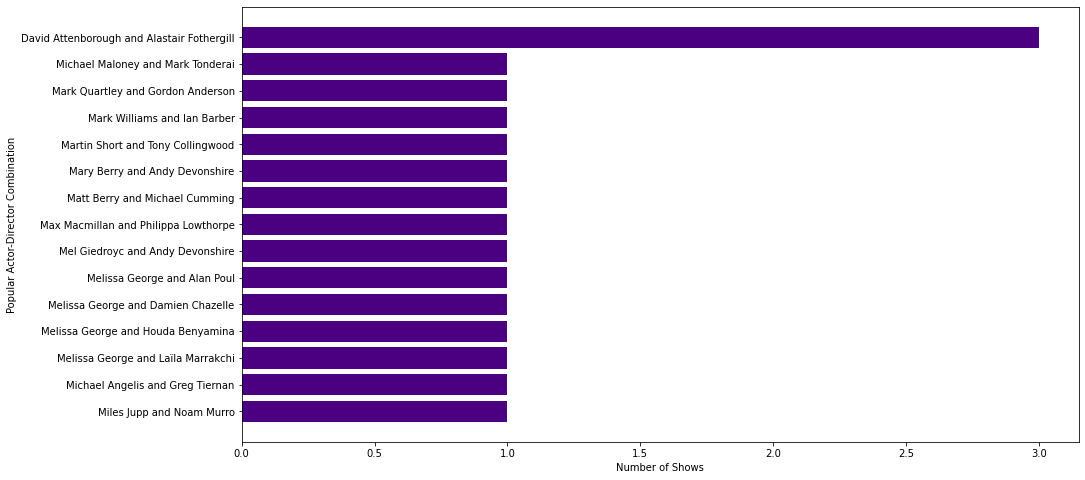

In [154]:
df_actors_directors=df_uk_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

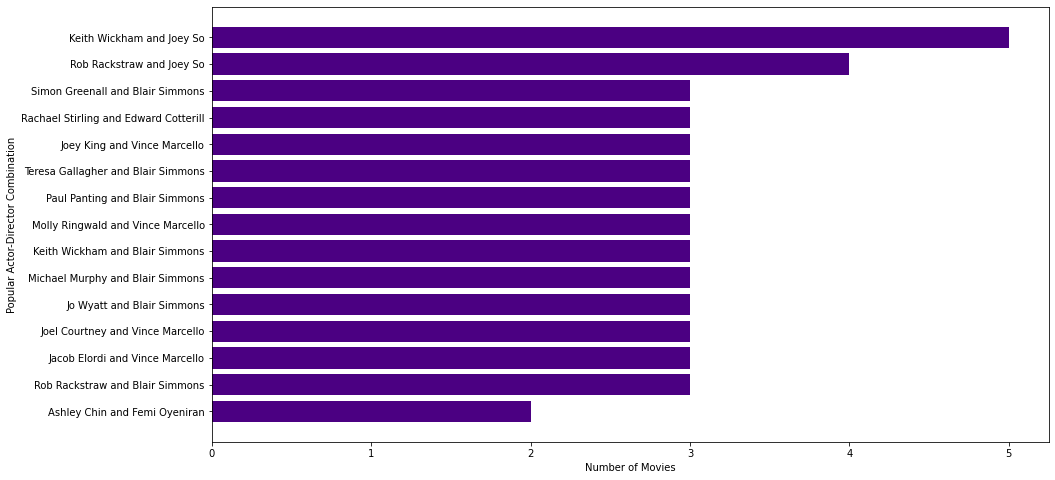

In [155]:
df_actors_directors=df_uk_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [156]:
df_actors_directors['Actor_Director_Combination'].values

array(['Keith Wickham and Joey So', 'Rob Rackstraw and Joey So',
       'Simon Greenall and Blair Simmons',
       'Rachael Stirling and Edward Cotterill',
       'Joey King and Vince Marcello',
       'Teresa Gallagher and Blair Simmons',
       'Paul Panting and Blair Simmons',
       'Molly Ringwald and Vince Marcello',
       'Keith Wickham and Blair Simmons',
       'Michael Murphy and Blair Simmons', 'Jo Wyatt and Blair Simmons',
       'Joel Courtney and Vince Marcello',
       'Jacob Elordi and Vince Marcello',
       'Rob Rackstraw and Blair Simmons', 'Ashley Chin and Femi Oyeniran'],
      dtype=object)

**The Most Popular Actor Director Combination in Movies Across UK are:-**
<br>
'Keith Wickham and Joey So',
<br>
'Rob Rackstraw and Joey So'

#### Univariate Analysis separately for shows in Japan
---



In [157]:
#Analyzing India for both shows and movies
df_japan_shows=df_final1[df_final1['country']=='Japan'][df_final1[df_final1['country']=='Japan']['type']=='TV Show']

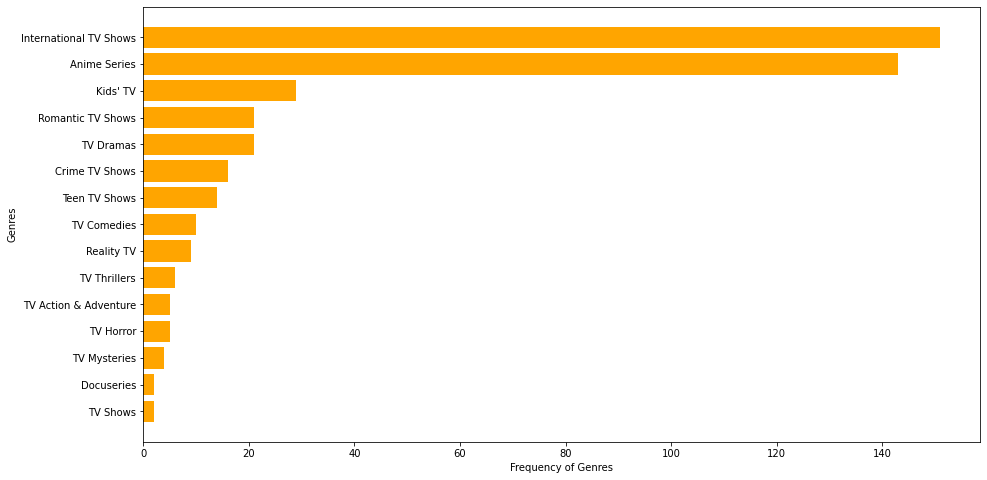

In [158]:
df_genre=df_japan_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows and Anime Genres are popular in TV Shows in Japan

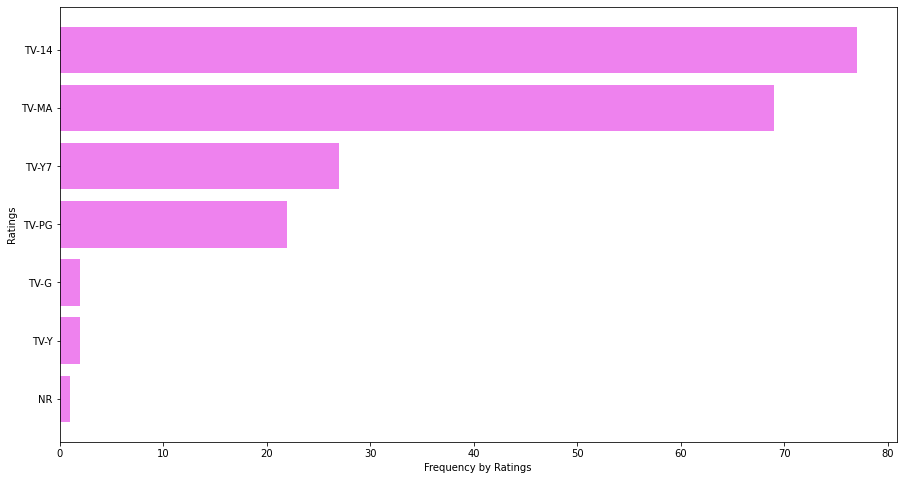

In [159]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes TV-14 Mature Audiences in TV Shows 

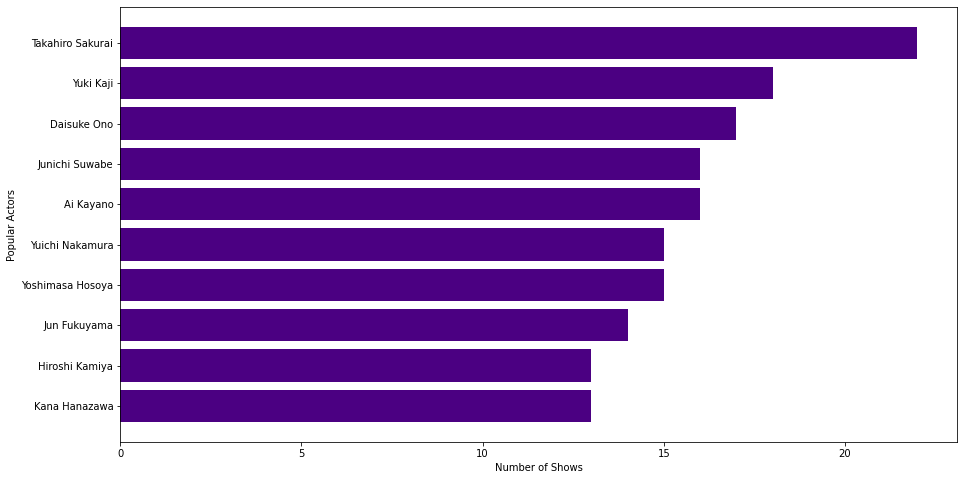

In [160]:
df_actors=df_japan_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [161]:
df_actors['Actors'].values

array(['Takahiro Sakurai', 'Yuki Kaji', 'Daisuke Ono', 'Junichi Suwabe',
       'Ai Kayano', 'Yuichi Nakamura', 'Yoshimasa Hosoya', 'Jun Fukuyama',
       'Hiroshi Kamiya', 'Kana Hanazawa'], dtype=object)

**Popular Actors in TV Shows in Japan are:-**
<br>
'Takahiro Sakurai',
<br>
'Yuki Kaji',
<br>
'Daisuke Ono',
<br>
'Junichi Suwabe',
<br>
'Ai Kayano',
<br>
'Yuichi Nakamura',
<br>
'Yoshimasa Hosoya',
<br>
'Jun Fukuyama',
<br>
'Hiroshi Kamiya',
<br>
'Kana Hanazawa'

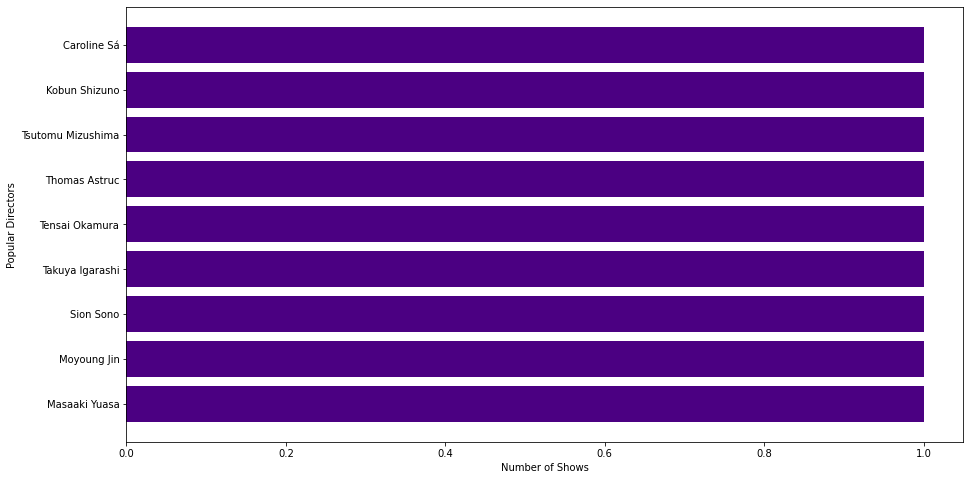

In [162]:
df_directors=df_japan_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

In [163]:
df_directors['Directors'].values

array(['Caroline Sá', 'Kobun Shizuno', 'Tsutomu Mizushima',
       'Thomas Astruc', 'Tensai Okamura', 'Takuya Igarashi', 'Sion Sono',
       'Moyoung Jin', 'Masaaki Yuasa'], dtype=object)

**All Directors are one time directors only**

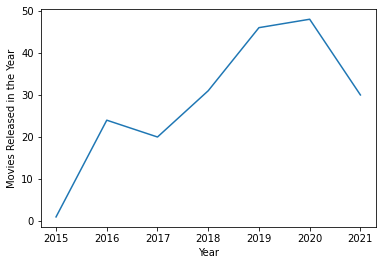

In [164]:
df_year=df_japan_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In Japan, TV Shows have diminished in 2017 from 2016 and then increased till 2020 after which it has reduced in 2021.

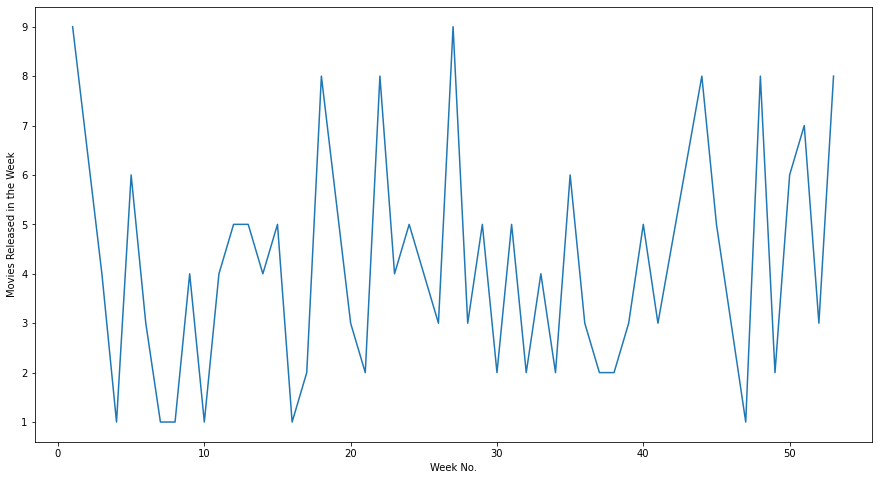

In [165]:
df_week=df_japan_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

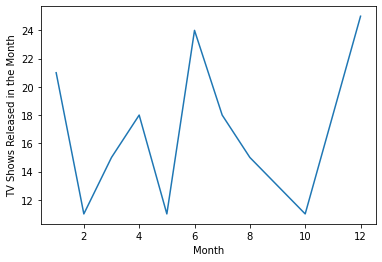

In [166]:
df_month=df_japan_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by significant numbers in April and January in Japan

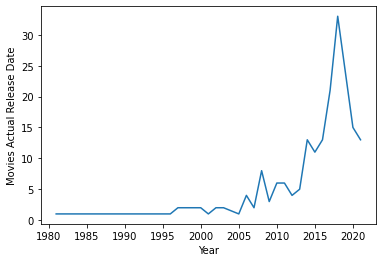

In [167]:
df_release_year=df_japan_shows[df_japan_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Reduction in TV Shows after 2019 in Japan

#### Univariate Analysis separately for shows in South Korea
---



In [168]:
#Analyzing India for both shows and movies
df_sk_shows=df_final1[df_final1['country']=='South Korea'][df_final1[df_final1['country']=='South Korea']['type']=='TV Show']

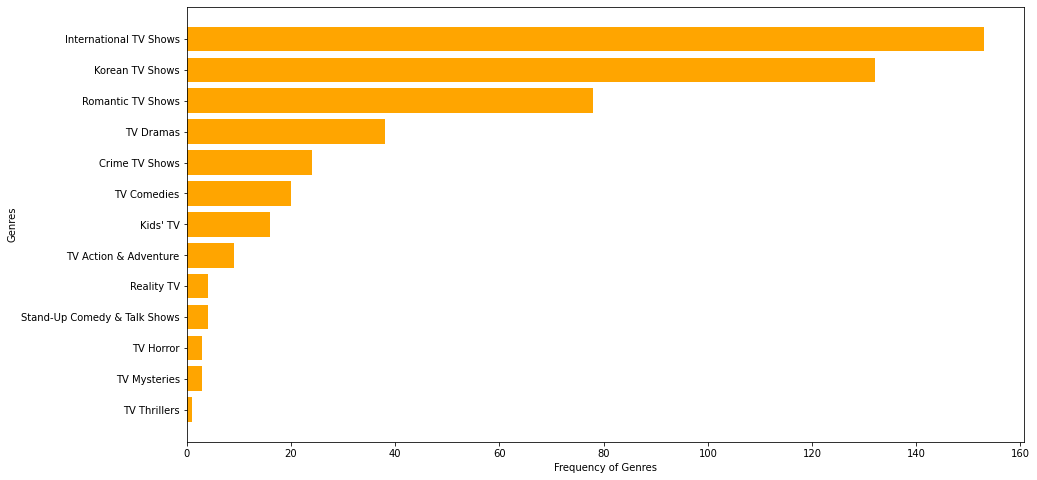

In [169]:
df_genre=df_sk_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows,Romantic TV Shows,Drama,Crime and Comedy Genres are popular in TV Shows in S.Korea.

Only S.Korea has Romance as a top 3 favorable genre which depicts an inclination of their audience

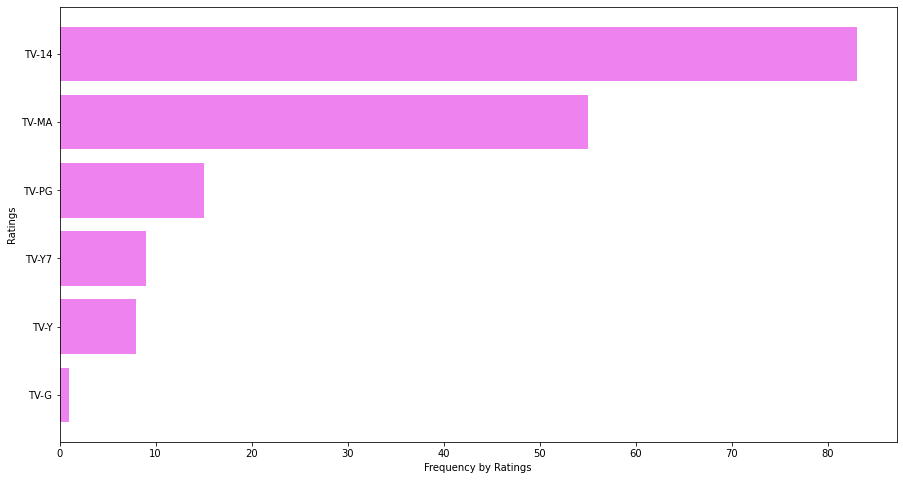

In [170]:
df_rating=df_sk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes TV-14 and Mature Audiences in TV Shows 

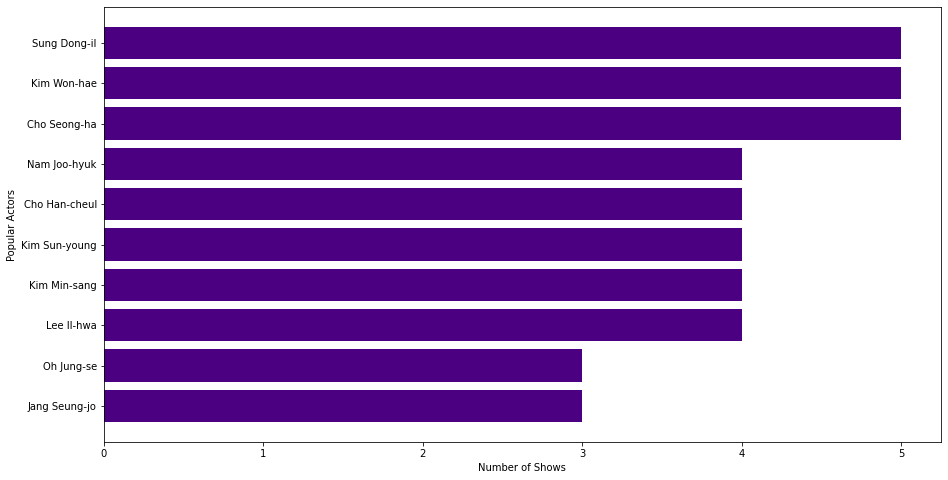

In [171]:
df_actors=df_sk_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [172]:
df_actors['Actors'].values

array(['Sung Dong-il', 'Kim Won-hae', 'Cho Seong-ha', 'Nam Joo-hyuk',
       'Cho Han-cheul', 'Kim Sun-young', 'Kim Min-sang', 'Lee Il-hwa',
       'Oh Jung-se', 'Jang Seung-jo'], dtype=object)

**Popular Actors in TV Shows in South Korea are:-**
<br>
'Sung Dong-il',
<br>
'Kim Won-hae',
<br>
'Cho Seong-ha',
<br>
'Nam Joo-hyuk'


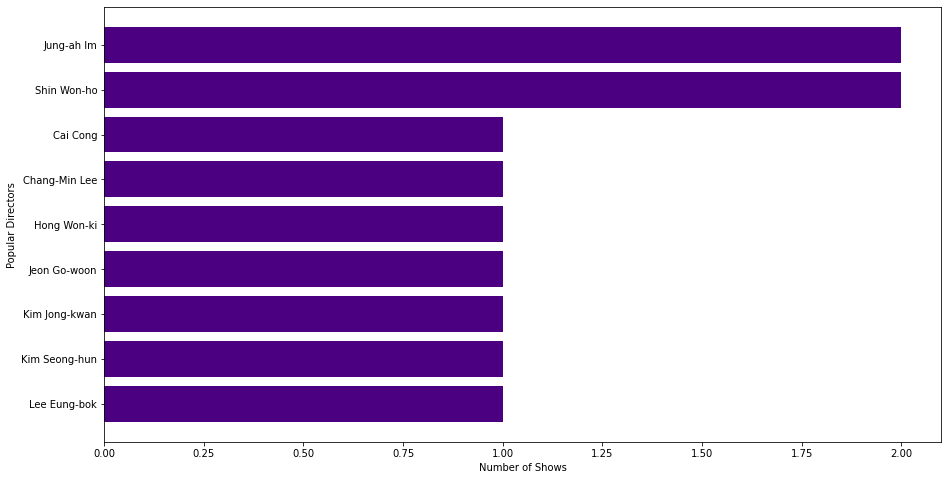

In [173]:
df_directors=df_sk_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

**Two directors have directed 2 shows and rest all Directors are one time directors only**

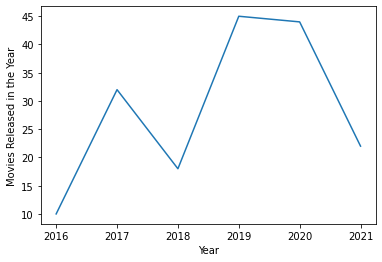

In [174]:
df_year=df_sk_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In South Korea, number of TV Shows reduced in 2018 from 2017, then increased till 2019 but have been on a heavy downfall since then

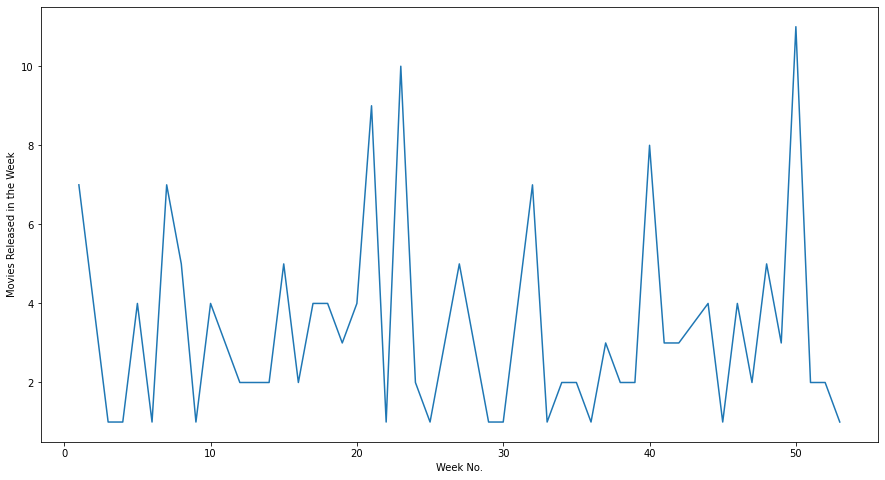

In [175]:
df_week=df_sk_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

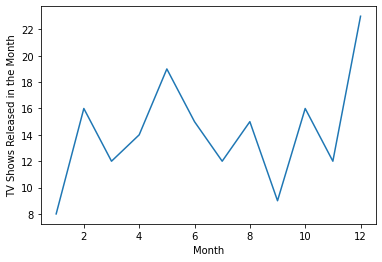

In [176]:
df_month=df_sk_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by significant numbers in May and January in South Korea

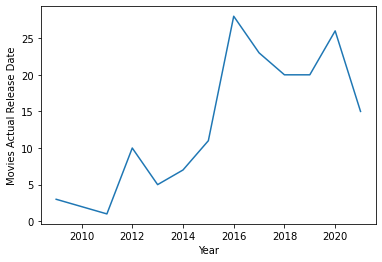

In [177]:
df_release_year=df_sk_shows[df_sk_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

The number of TV Shows in S.Korea reached peak in 2016. It then reached  
a second peak in 2019. It has reduced in 2021 from 2020.

### Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are 
Drama, Comedy and International TV Shows/Movies, so content aligning to that 
is recommended.

2)Add TV Shows in July/August and Movies in last week of the year/first month of 
the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows
are also popular along with the genres in first point, hence recommended.

4)For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5)The target audience in USA and India is recommended to be 14+ and above ratings while
for UK, its recommended to be completely Mature/R content .

6)Add movies for Indian Audience, it has been declining since 2018.

7)Anime Genre for Japan and Romantic Genre in TV Shows for
 South Korean audiences is recommended.

8) While creating content, take into consideration the popular actors/directors
for that country. Also take into account the director-actor combination which 
is highly recommended. 



In [178]:
print('Done')

Done
